In [156]:
## Importing required libaries
import requests as rs
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

# URL for scrapping the data

In [2]:
URL='https://stats.espncricinfo.com/ci/engine/stats/index.html?batting_hand=1;batting_hand=2;class=2;debut_or_last=1;debut_or_last=2;debut_or_last=3;debut_or_last=4;filter=advanced;floodlit=1;floodlit=2;home_or_away=1;home_or_away=2;home_or_away=3;innings_number=1;innings_number=2;orderby=runs;result=1;result=2;result=3;result=5;size=200;template=results;tournament_type=2;tournament_type=3;tournament_type=5;type=batting'

In [3]:
# looping for extract the data from multiple pages
name=[]
country=[]
year=[]    
mat=[]
inn=[]
no=[]
runs=[]
hs=[]
ave=[]
bf=[]
sr=[]
hun=[]
fif=[]
duc=[]
for i in range(1,15): # we have 14 pages to extract of 2800 rows
    url = "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=2;filter=advanced;home_or_away=1;home_or_away=2;orderby=runs;page=i;result=1;result=2;result=3;size=200;template=results;type=batting"
    page=rs.get(url) 
    data=bs(page.text) 
    batting=data.find_all("tr",class_="data1")
    for i in batting:
        name.append("".join(re.findall(r"\n(\w+ \w+ \w+|\w+ \w+\s)\(",i.text)))
        year.append("".join(re.findall(r"\n(\d+-\d+)\n",i.text)))
        country.append("".join(re.findall(r"\((\w+)\)",i.text)))
        mat.append(i.text.split("\n")[3])
        inn.append(i.text.split("\n")[4])
        no.append(i.text.split("\n")[5])
        runs.append(i.text.split("\n")[6])
        hs.append(i.text.split("\n")[7])
        ave.append(i.text.split("\n")[8])
        bf.append(i.text.split("\n")[9])
        sr.append(i.text.split("\n")[10])
        hun.append(i.text.split("\n")[11])
        fif.append(i.text.split("\n")[12])
        duc.append(i.text.split("\n")[13])


In [4]:
# Creating data frame from the above data
data=pd.DataFrame({"player_name":name,
            "country":country,
             "span":year,
             "matches_played":mat,
             "innings":inn,
             "not_outs":no,
             "total_runs":runs,
             "highest_score":hs, 
             "average":ave,
             "balls_faced":bf,
             "strike_rate":sr,
             "hundreads":hun,
             "fifties":fif,
             "ducks":duc})

In [5]:
# raw data
data

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks
0,SR Tendulkar,IND,1989-2012,296,294,20,11663,200*,42.56,13663,85.36,31,61,12
1,V Kohli,IND,2008-2023,218,215,27,10690,166*,56.86,11305,94.55,42,50,14
2,RT Ponting,AUS,1995-2012,277,273,28,10401,164,42.45,12851,80.93,23,64,15
3,KC Sangakkara,,2000-2015,275,265,29,9951,169,42.16,12576,79.12,14,65,8
4,JH Kallis,,1996-2014,240,232,32,8794,139,43.97,11862,74.13,13,68,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,M Kaif,IND,2002-2006,87,81,13,1797,87*,26.42,2556,70.30,0,13,7
2796,LMP Simmons,WI,2006-2015,60,60,3,1797,122,31.52,2525,71.16,1,15,7
2797,VVS Laxman,IND,1998-2006,60,59,4,1790,107,32.54,2462,72.70,5,8,2
2798,MW Gatting,ENG,1977-1993,78,74,15,1786,115*,30.27,2578,69.27,1,8,4


In [6]:
data["starting_year"]=data["span"].apply(lambda x:x.split("-")).apply(lambda x:x[0])

In [7]:
data["ending_year"]=data["span"].apply(lambda x:x.split("-")).apply(lambda x:x[1])

In [8]:
data

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
0,SR Tendulkar,IND,1989-2012,296,294,20,11663,200*,42.56,13663,85.36,31,61,12,1989,2012
1,V Kohli,IND,2008-2023,218,215,27,10690,166*,56.86,11305,94.55,42,50,14,2008,2023
2,RT Ponting,AUS,1995-2012,277,273,28,10401,164,42.45,12851,80.93,23,64,15,1995,2012
3,KC Sangakkara,,2000-2015,275,265,29,9951,169,42.16,12576,79.12,14,65,8,2000,2015
4,JH Kallis,,1996-2014,240,232,32,8794,139,43.97,11862,74.13,13,68,13,1996,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,M Kaif,IND,2002-2006,87,81,13,1797,87*,26.42,2556,70.30,0,13,7,2002,2006
2796,LMP Simmons,WI,2006-2015,60,60,3,1797,122,31.52,2525,71.16,1,15,7,2006,2015
2797,VVS Laxman,IND,1998-2006,60,59,4,1790,107,32.54,2462,72.70,5,8,2,1998,2006
2798,MW Gatting,ENG,1977-1993,78,74,15,1786,115*,30.27,2578,69.27,1,8,4,1977,1993


# Data Cleanning

In [9]:
# in player_name column i have empty cells so replacing them with nan value
data = data.replace(r'^\s*$', np.nan, regex=True)

In [10]:
#droping the complete row where ever the player_name column is nan.(without player name the complete row is un-necessary)
data.dropna(inplace=True)
#data.reset_index(inplace=True)

In [11]:
# highest_score this columns contains un-necessary symbols with int values so replacing them with empty spaces
data["highest_score"]=data["highest_score"].apply(lambda x:x.replace("*",""))


In [12]:
#average contains special(-) symbol replacing with 0 because average contains only int value
data["average"]=data["average"].replace({"-":0}) 


In [13]:
# converting the column type into exact type
data["matches_played"]=data["matches_played"].astype(int)
data["innings"]=data["innings"].astype(int)
data["not_outs"]=data["not_outs"].astype(int)
data["total_runs"]=data["total_runs"].astype(int)
data["highest_score"]=data["highest_score"].astype(int)
data["average"]=data["average"].astype(float)
data["balls_faced"]=data["balls_faced"].astype(int)
data['strike_rate']=data['strike_rate'].astype(float)
data["hundreads"]=data["hundreads"].astype(int)
data["fifties"]=data["fifties"].astype(int)
data["ducks"]=data["ducks"].astype(int)
data["starting_year"]=data["starting_year"].astype(int)
data["ending_year"]=data["ending_year"].astype(int)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2492 entries, 0 to 2799
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player_name     2492 non-null   object 
 1   country         2492 non-null   object 
 2   span            2492 non-null   object 
 3   matches_played  2492 non-null   int32  
 4   innings         2492 non-null   int32  
 5   not_outs        2492 non-null   int32  
 6   total_runs      2492 non-null   int32  
 7   highest_score   2492 non-null   int32  
 8   average         2492 non-null   float64
 9   balls_faced     2492 non-null   int32  
 10  strike_rate     2492 non-null   float64
 11  hundreads       2492 non-null   int32  
 12  fifties         2492 non-null   int32  
 13  ducks           2492 non-null   int32  
 14  starting_year   2492 non-null   int32  
 15  ending_year     2492 non-null   int32  
dtypes: float64(2), int32(11), object(3)
memory usage: 223.9+ KB


In [15]:
# cleaned data
data

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
0,SR Tendulkar,IND,1989-2012,296,294,20,11663,200,42.56,13663,85.36,31,61,12,1989,2012
1,V Kohli,IND,2008-2023,218,215,27,10690,166,56.86,11305,94.55,42,50,14,2008,2023
2,RT Ponting,AUS,1995-2012,277,273,28,10401,164,42.45,12851,80.93,23,64,15,1995,2012
5,MS Dhoni,IND,2004-2019,260,233,65,8769,183,52.19,10007,87.62,8,62,6,2004,2019
6,DPMD Jayawardene,SL,1998-2015,299,282,28,8136,144,32.03,10382,78.36,11,49,21,1998,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,M Kaif,IND,2002-2006,87,81,13,1797,87,26.42,2556,70.30,0,13,7,2002,2006
2796,LMP Simmons,WI,2006-2015,60,60,3,1797,122,31.52,2525,71.16,1,15,7,2006,2015
2797,VVS Laxman,IND,1998-2006,60,59,4,1790,107,32.54,2462,72.70,5,8,2,1998,2006
2798,MW Gatting,ENG,1977-1993,78,74,15,1786,115,30.27,2578,69.27,1,8,4,1977,1993


In [16]:
# finding outliers
def count_outliers(df):
    # calculate the quartiles and IQR for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    # define the outlier threshold for each column
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    
    # count the number of outliers for each column
    num_outliers = ((df < lower_threshold) | (df > upper_threshold)).sum()
    
    return num_outliers


In [17]:
count_outliers(data)

average            70
balls_faced        70
country             0
ducks              28
ending_year         0
fifties            42
highest_score      42
hundreads         196
innings            70
matches_played     84
not_outs           84
player_name         0
span                0
starting_year       0
strike_rate        42
total_runs         84
dtype: int64

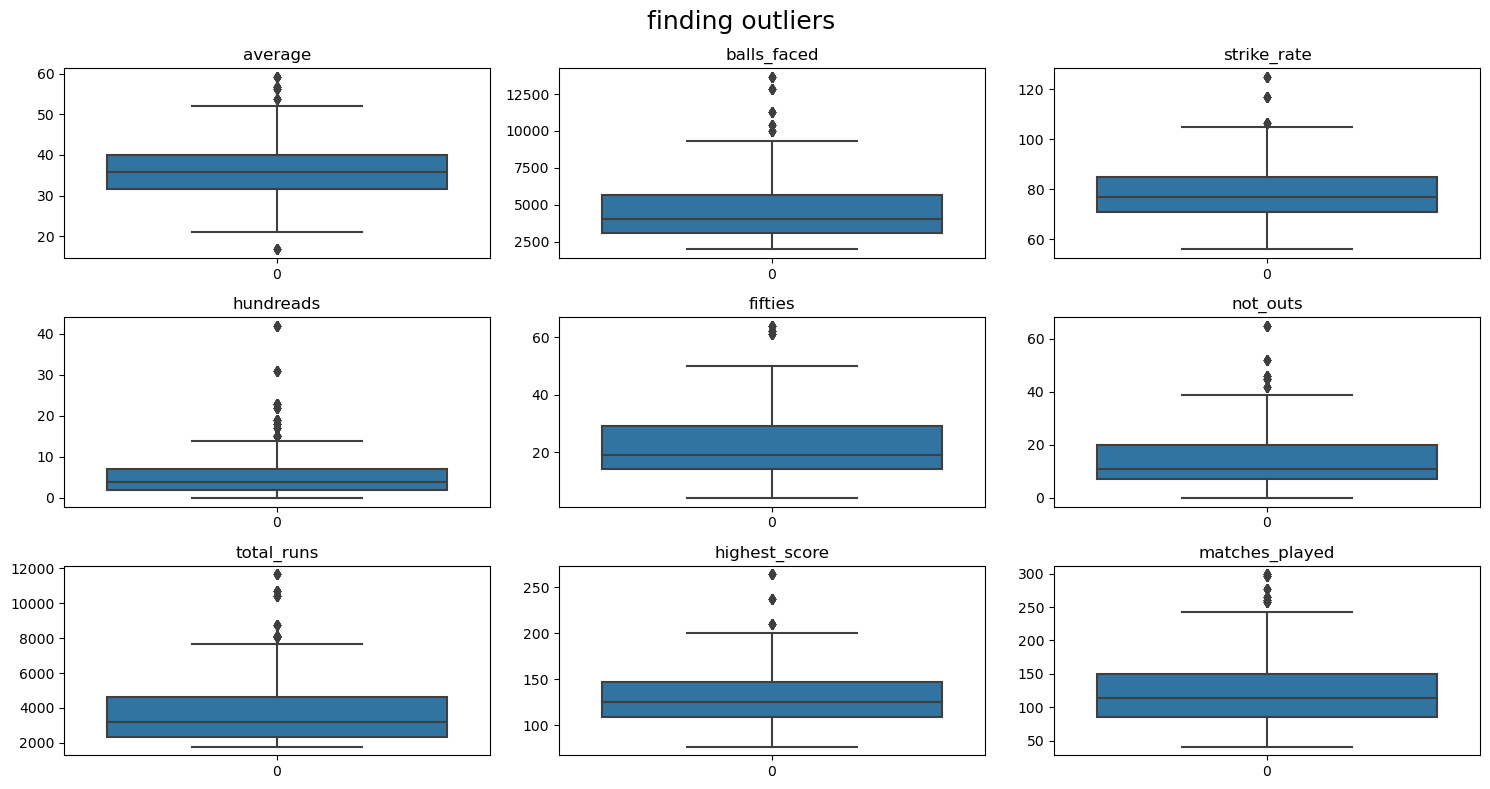

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with six subplots
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,8))

# Create list of column names
columns = ['average', 'balls_faced', 'strike_rate', 'hundreads', 'fifties', 'not_outs', 'total_runs', 'highest_score', 'matches_played']

# Plot box plot for the first column
sns.boxplot(data=data[columns[0]], ax=axs[0, 0])
axs[0, 0].set_title(columns[0])

# Plot box plot for the second column
sns.boxplot(data=data[columns[1]], ax=axs[0, 1])
axs[0, 1].set_title(columns[1])

# Plot box plot for the third column
sns.boxplot(data=data[columns[2]], ax=axs[0, 2])
axs[0, 2].set_title(columns[2])

# Plot box plot for the fourth column
sns.boxplot(data=data[columns[3]], ax=axs[1,0])
axs[1,0].set_title(columns[3])

# Plot box plot for the fifth column
sns.boxplot(data=data[columns[4]], ax=axs[1, 1])
axs[1, 1].set_title(columns[4])

# Plot box plot for the sixth column
sns.boxplot(data=data[columns[5]], ax=axs[1, 2])
axs[1, 2].set_title(columns[5])

sns.boxplot(data=data[columns[6]], ax=axs[2, 0])
axs[2,0].set_title(columns[6])

sns.boxplot(data=data[columns[7]], ax=axs[2, 1])
axs[2,1].set_title(columns[7])

sns.boxplot(data=data[columns[8]], ax=axs[2,2])
axs[2,2].set_title(columns[8])

# Add overall title
fig.suptitle('finding outliers ', fontsize=18)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()





# DATA-ANALYSIS

## Univariate analysis

In [19]:
data.describe()

,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
count,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000
mean,123.056180,116.713483,14.735955,3724.112360,131.382022,36.426180,4741.617978,78.719888,5.601124,22.073034,7.219101,1997.584270,2009.674157
std,51.544636,48.567043,11.434702,1836.657801,28.833638,7.175906,2190.086807,10.979173,5.812179,11.442431,4.263612,11.161263,10.644721
min,41.000000,40.000000,0.000000,1778.000000,77.000000,16.720000,1975.000000,55.910000,0.000000,4.000000,0.000000,1971.000000,1983.000000
25%,86.000000,83.000000,7.000000,2308.000000,109.000000,31.610000,3076.000000,70.790000,2.000000,14.000000,4.000000,1989.000000,2002.000000
50%,114.000000,105.500000,11.000000,3201.500000,125.000000,35.705000,4040.000000,76.980000,4.000000,19.000000,6.000000,1999.000000,2011.000000
75%,150.000000,143.000000,20.000000,4609.000000,147.000000,40.050000,5662.000000,85.010000,7.000000,29.000000,10.000000,2007.000000,2019.000000
max,299.000000,294.000000,65.000000,11663.000000,264.000000,59.260000,13663.000000,124.900000,42.000000,64.000000,24.000000,2017.000000,2023.000000


## INSIGHTS

#### matches_played
- The highest no.of matches played by a player is 299 and least matches is 41.
- The average matches played by most of the players is 123.
- There are 25% of players played less than 86 matches.
- There are 25% of players played grater than 114 matches.
- there are 25% of players played grater than 150 and less than 114 matches.
- There are 25% of players played grater than 150 and less than 299 matches.

#### INNINGS
- the maximum no of innings played by a player is 294 and minimum no.of innings played by a player is 40.
- the average innings played by a player is 116.
- 25% players played less than 83 innings.
- 25% players played more than 105 innings.
- 25% players played more than 143 and less than 105 innings.
- 25% players played more than 143 and less than 294 innings.

#### not_outs
- the maximum times player notouts is 65 and min is 0.
- the average notouts of players is 14.
- there are 25% of players are notout less than 7 times.
- there are 25% of players are notout greater than 11 times.
- there are 25% of players are less than 11 and grater than 20 times notout.
- there are 25% of players are less than 65 and grater than 20 times notout.

#### total_runs
- There maximum no of total runs of a player is 11663 and minimum runs is 1778.
- the average total runs of a player is 3724.
- there are 25% of players total runs is less than 2308.
- there are 25% of players total runs is grater than 3201.
- there are 25% of players total runs less than 3201 and grater than 4609.
- there are 25% of players total runs less than 11663 and grater than 4609.

#### highest_score
- the maximum highest score of the player is 264 and minimum is 77.
- the average highest score of a player is 131.
- there are 25% of players score less than 109.
- there are 25% of players score is grater than 125.
- there are 25% of players score less than 125 and grater than 147.
- there are 25% of players score less than 264 and grater than 147.

#### average

- the average minimum score of the player is 16 and maximum is 59.
- the average of average score of the player is 36.
- there are 25% of players their average score is less than 31
- there are 25% of players their average score is grater than 35.
- there are 25% of players their average score is less than 35 and grater than 40.
- there are 25% of players their average score is less than 59 and grater than 40.

#### balls_faced

- the minimum balles faced of the player is 1975 and maximum is 13663.
- the average balls faced of a player is 4741.
- there are 25% of players balls faced is less than 3076
- there are 25% of players balls faced is grater than 4040.
- there are 25% of players balls faced is less than 4040 and grater than 5662.
- there are 25% of players balls faced is less than 13663 and grater than 5662.

#### strike_rate

- the minimum strike rate of the player is 55 and maximum is 124.
- the average strike rate of a player is 78.
- there are 25% of players strike rate is less than 70
- there are 25% of players strike rate is grater than 76.
- there are 25% of players strike rate is less than 76 and grater than 85.
- there are 25% of players strike rate is less than 124 and grater than 85.

#### hundreads

- the maximum no of hundreds hit by a player is 42 and minimum is 0.
- the average hundreads scored by the players is 5.
- there are 25% players scored less than 2 centuries.
- there are 25% players scored greater than 4 centuries.
- there are 25% players scored less than 4 and grater than 7 centuries.
- there are 25% players scored less than 42 and grater than 7

#### fifties

- the maximum no of fifties hit by a player is 64 and minimum is 4.
- the average players fifties is 22.
- there are 25% players hitted less than 14 fifties.
- there are 25% players hitted grater than 19 fifties.
- there are 25% players hitted less than 19 and gratter than 29 fifties.
- there are 25% players hitted less than 64 and grater than 29 fifties.

In [20]:
data.describe()

,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
count,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000,2492.000000
mean,123.056180,116.713483,14.735955,3724.112360,131.382022,36.426180,4741.617978,78.719888,5.601124,22.073034,7.219101,1997.584270,2009.674157
std,51.544636,48.567043,11.434702,1836.657801,28.833638,7.175906,2190.086807,10.979173,5.812179,11.442431,4.263612,11.161263,10.644721
min,41.000000,40.000000,0.000000,1778.000000,77.000000,16.720000,1975.000000,55.910000,0.000000,4.000000,0.000000,1971.000000,1983.000000
25%,86.000000,83.000000,7.000000,2308.000000,109.000000,31.610000,3076.000000,70.790000,2.000000,14.000000,4.000000,1989.000000,2002.000000
50%,114.000000,105.500000,11.000000,3201.500000,125.000000,35.705000,4040.000000,76.980000,4.000000,19.000000,6.000000,1999.000000,2011.000000
75%,150.000000,143.000000,20.000000,4609.000000,147.000000,40.050000,5662.000000,85.010000,7.000000,29.000000,10.000000,2007.000000,2019.000000
max,299.000000,294.000000,65.000000,11663.000000,264.000000,59.260000,13663.000000,124.900000,42.000000,64.000000,24.000000,2017.000000,2023.000000


#### ducks

- the maximum no of duck outs of a player is 24 and minimum is 0.
- the average duck outs of player is 7.
- there 25% players dissmissed by duck out less than 4 times.
- there are 25% of players dismissed by duckouts greater than 6 times.
- there are 25% of players dismmissed by duckouts in the range of 6 to 10.
- there are 25% of players dismmissed by duckouts in the range of 10 to 24.

# Visualization

In [ ]:
# finding the player starting year and ending years.

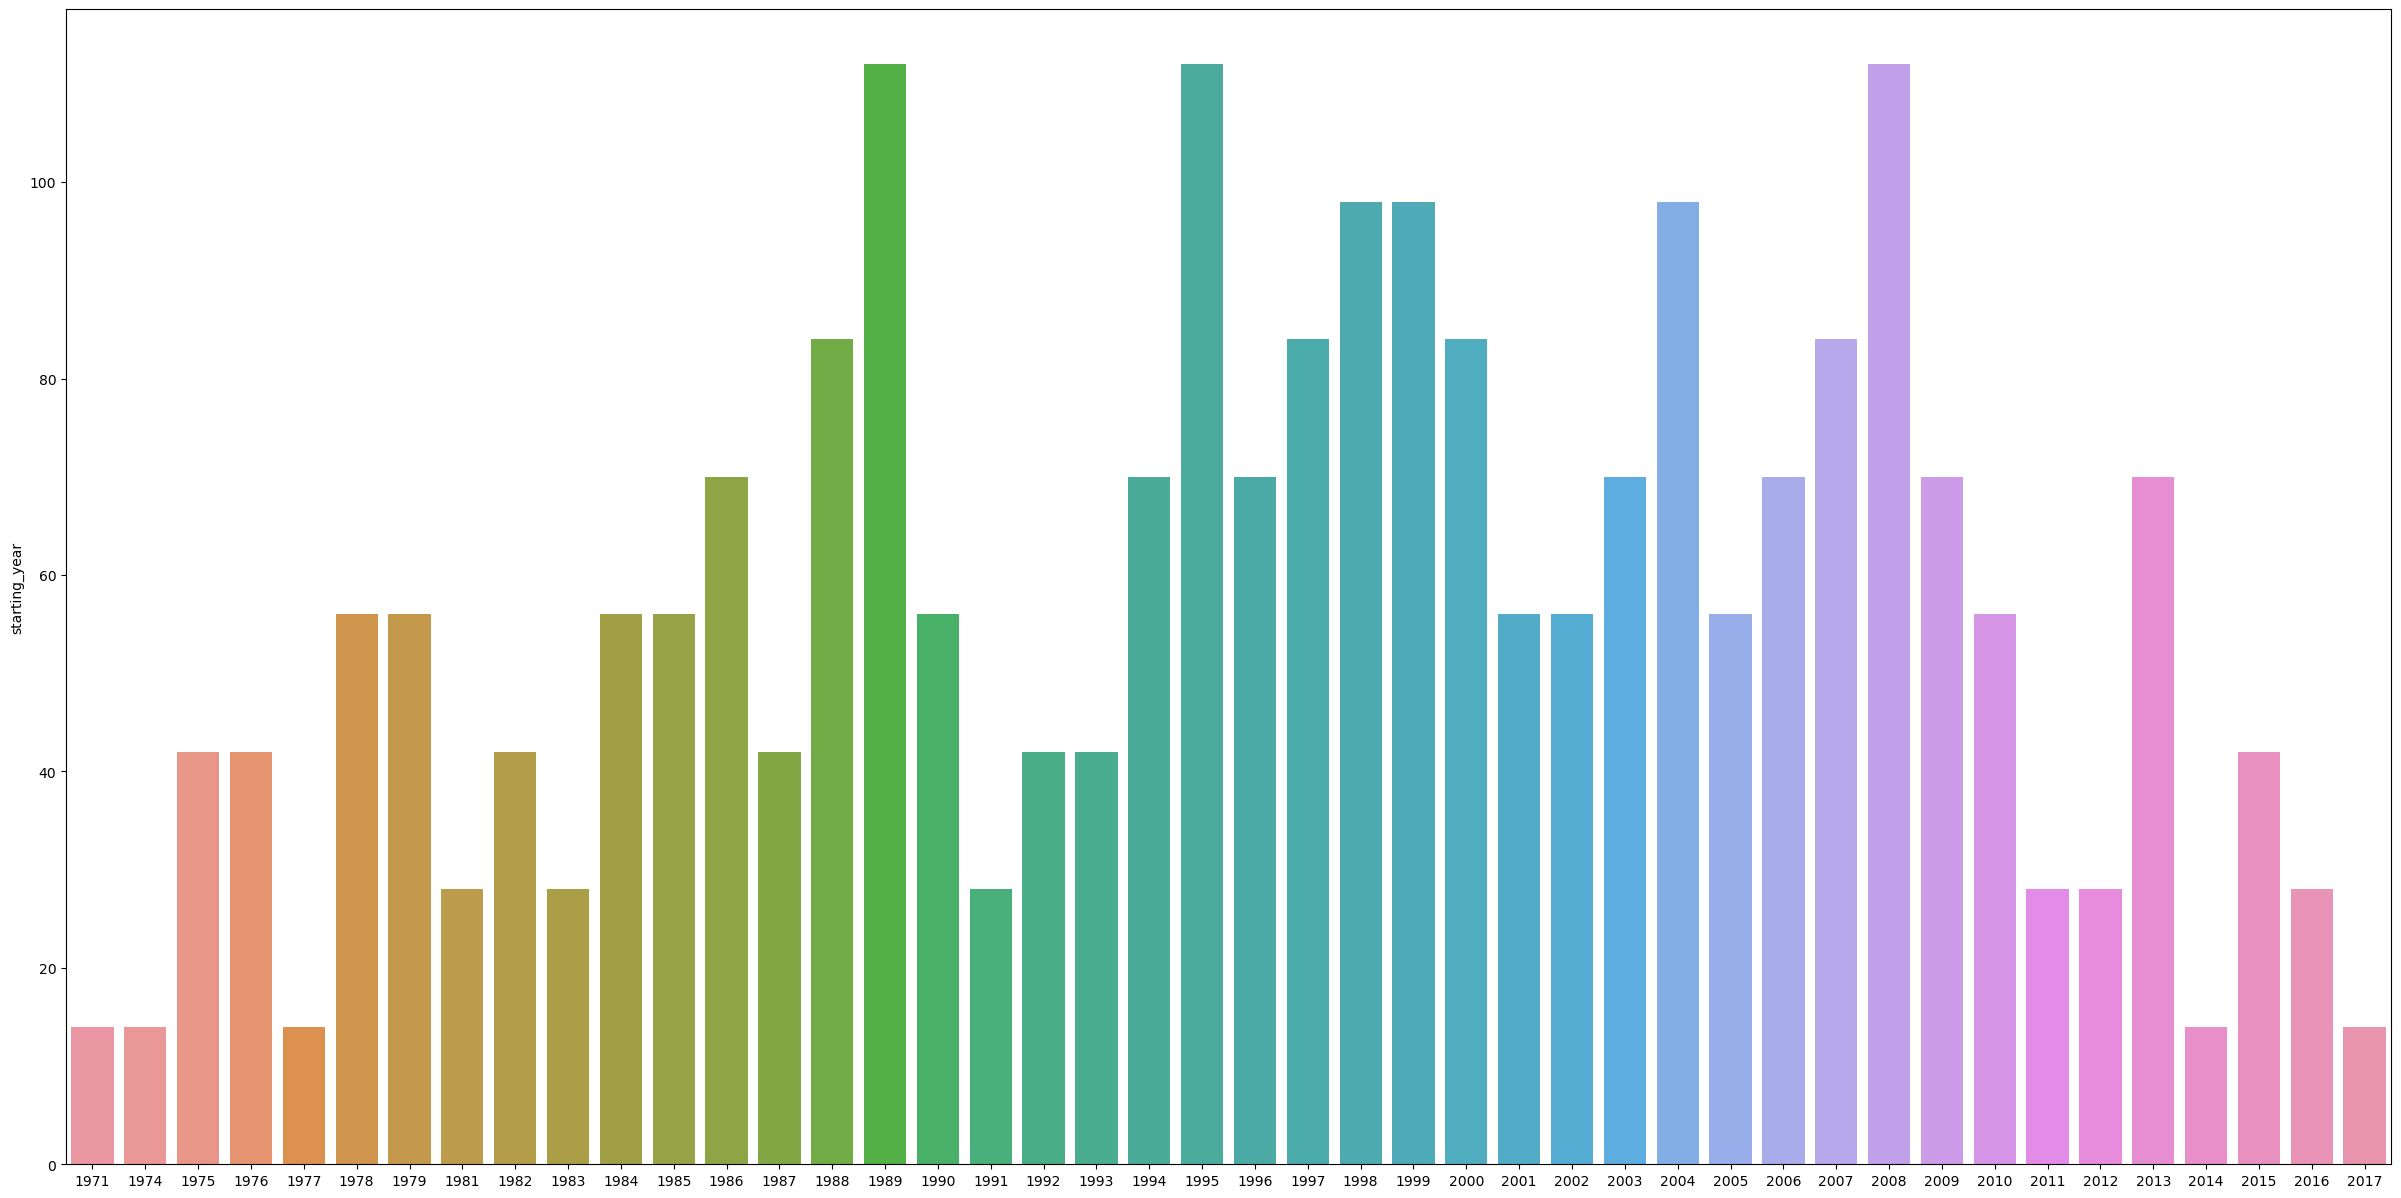

In [21]:
a=data["starting_year"].value_counts()
plt.figure(figsize=(30,15))
sns.barplot(data["starting_year"].unique(),a)
plt.show()

##### most of the players started their carrier in the years 1989, 1995, 2008.

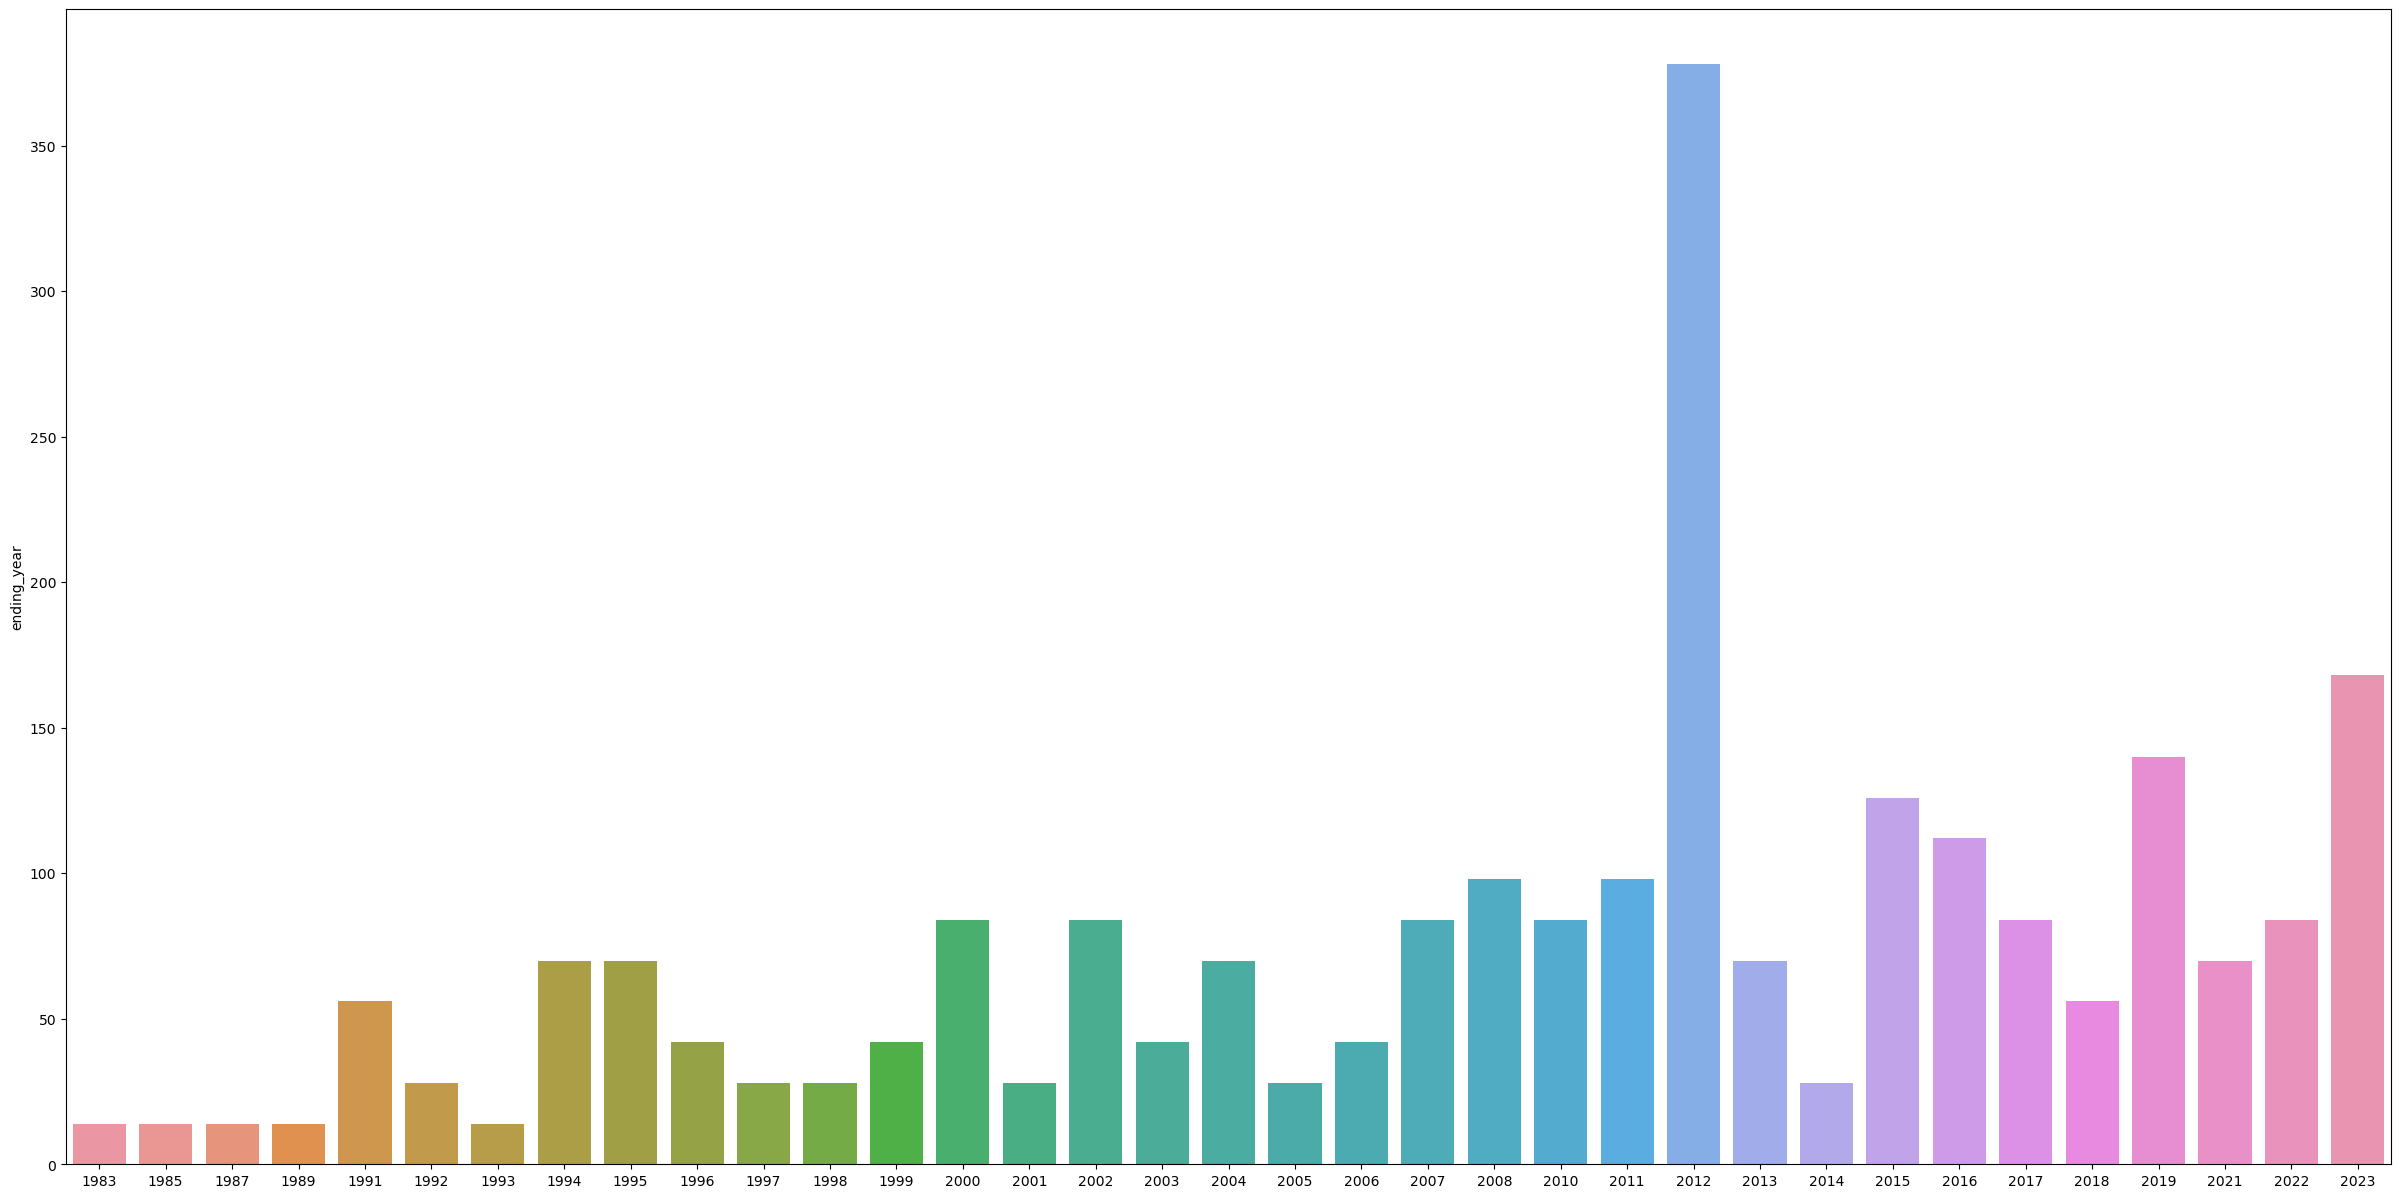

In [22]:
a=data["ending_year"].value_counts()
plt.figure(figsize=(30,15))
sns.barplot(data["ending_year"].unique(),a)
plt.show()

##### most of the players retired in the year 2012

# Bi-variate analysis 

In [52]:
data['country'].value_counts()

AUS      406
ENG      322
IND      294
NZ       266
PAK      252
WI       224
SL       210
ZIM      210
SA       168
BAN       70
IRE       28
SCOT      28
KENYA     14
Name: country, dtype: int64

### To represent the object(catagirical) columns i am using pie chart and bar plot

In [ ]:
# finding the no of players in each country

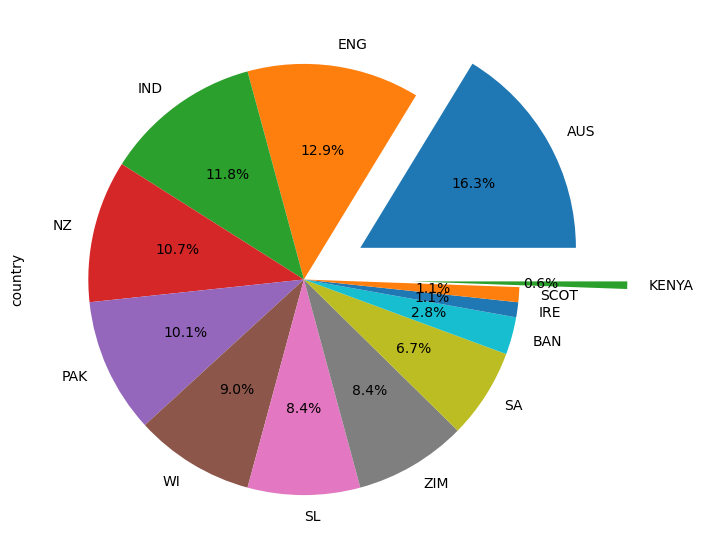

In [59]:
plt.figure(figsize=(10,7))
data["country"].value_counts().plot.pie(autopct="%.1f%%",explode=[0.3,0,0,0,0,0,0,0,0,0,0,0,0.5])
plt.show()

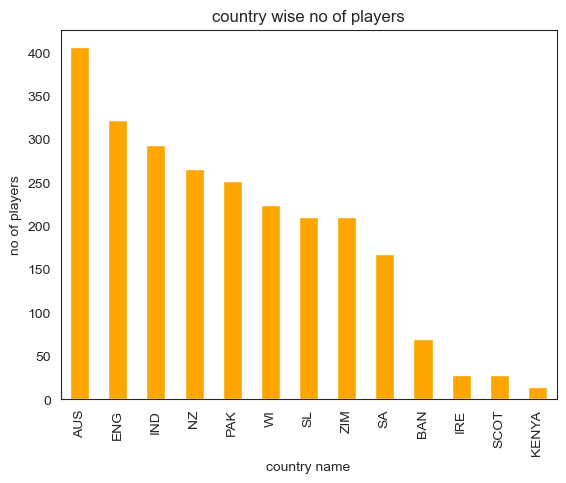

In [30]:
data["country"].value_counts().plot.bar(color="orange")
plt.xlabel("country name")
plt.ylabel("no of players")
plt.title("country wise no of players")
plt.show()

- Most of the players from Australia(16.3%)

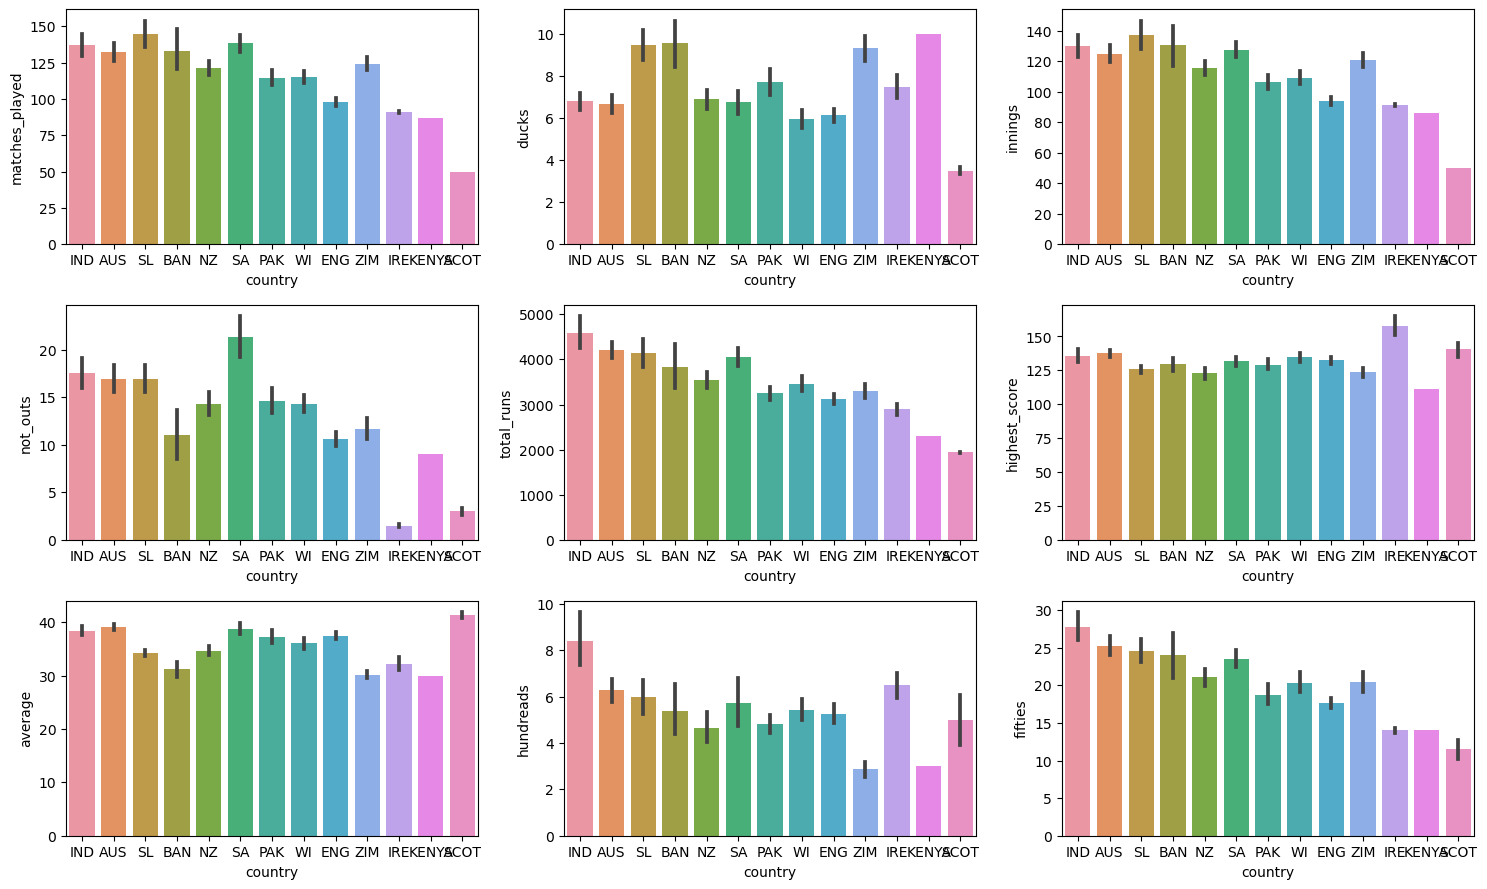

In [64]:
fig, axs = plt.subplots(3, 3, figsize=(15, 9))
sns.barplot(x=data["country"],y=data["matches_played"], ax=axs[0,0])
sns.barplot(x=data["country"],y=data["ducks"], ax=axs[0,1])
sns.barplot(x=data["country"],y=data["innings"], ax=axs[0,2])
sns.barplot(x=data["country"],y=data["not_outs"], ax=axs[1,0])
sns.barplot(x=data["country"],y=data["total_runs"], ax=axs[1,1])
sns.barplot(x=data["country"],y=data["highest_score"], ax=axs[1,2])
sns.barplot(x=data["country"],y=data["average"], ax=axs[2,0])
sns.barplot(x=data["country"],y=data["hundreads"], ax=axs[2,1])
sns.barplot(x=data["country"],y=data["fifties"], ax=axs[2,2])
plt.tight_layout()
plt.show()

- more no of matches played by sree lanka team player,least matches by scotland player.
- most time got ducked players from sree lanka bangladesh kanya and least from team scot land.
- most no of innings played by sl players and least by scot.
- players of south africa ha most no of players are not out and least from ire.
- total carrier runs of indian players is high and scot players runs is low.
- player of ire scored high score in an inning and least by keny.
- the average score of the scot  players is high and least zim is low.
- players of india has scored more no of hundreads,zim is the least.
- player of india has scored more no of fifties,scot is the least.

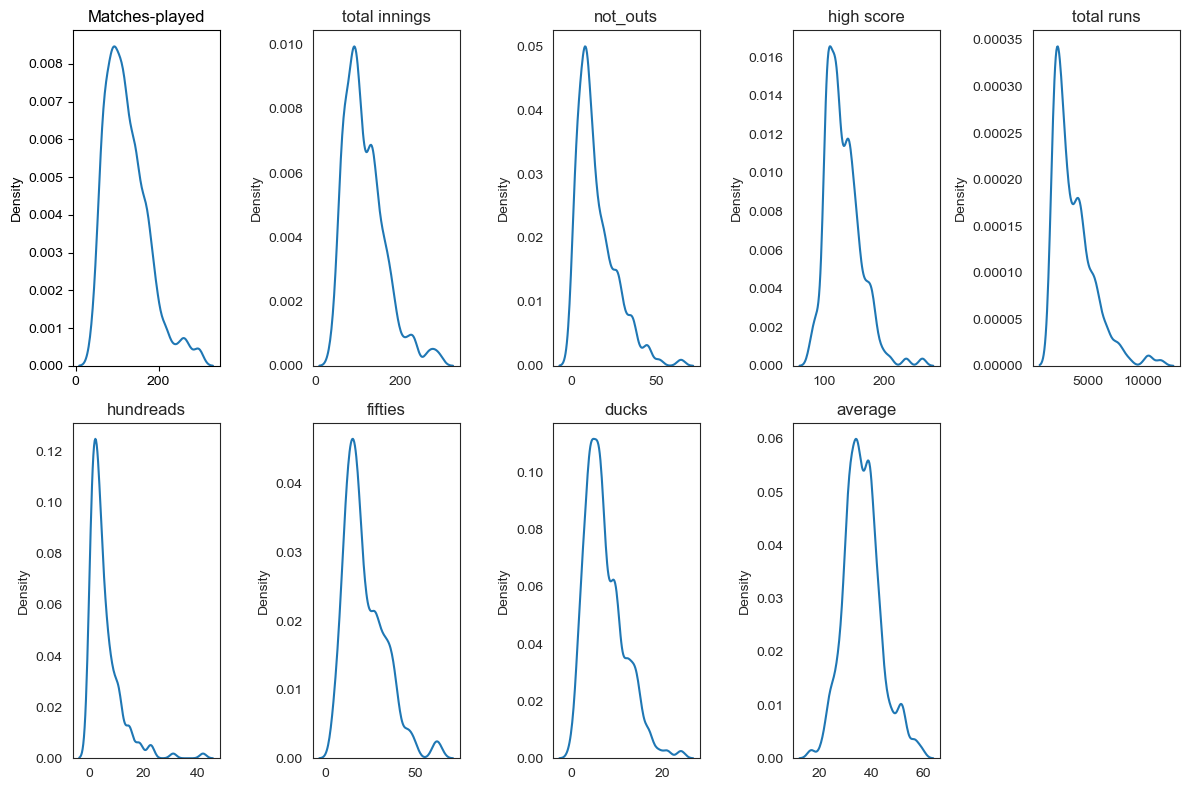

In [27]:
plt.figure(figsize=(12,8))

plt.subplot(2,5,1)
matches = data["matches_played"]
plt.title('Matches-played')
sns.set_style('white')
sns.kdeplot(np.array(matches))

plt.subplot(2,5,2)
innings = data["innings"]
plt.title('total innings')
sns.set_style('white')
sns.kdeplot(np.array(innings))

plt.subplot(2,5,3)
not_outs= data["not_outs"]
plt.title('not_outs')
sns.set_style('white')
sns.kdeplot(np.array(not_outs))

plt.subplot(2,5,4)
highest_score= data["highest_score"]
plt.title('high score')
sns.set_style('white')
sns.kdeplot(np.array(highest_score))

plt.subplot(2,5,5)
total_runs= data["total_runs"]
plt.title('total runs')
sns.set_style('white')
sns.kdeplot(np.array(total_runs))

plt.subplot(2,5,6)
hundreads= data["hundreads"]
plt.title('hundreads')
sns.set_style('white')
sns.kdeplot(np.array(hundreads))

plt.subplot(2,5,7)
fifties= data["fifties"]
plt.title('fifties')
sns.set_style('white')
sns.kdeplot(np.array(fifties))

plt.subplot(2,5,8)
ducks= data["ducks"]
plt.title('ducks')
sns.set_style('white')
sns.kdeplot(np.array(ducks))

plt.subplot(2,5,9)
average=data["average"]
plt.title("average")
sns.set_style("white")
sns.kdeplot(np.array(average))

plt.tight_layout()
plt.show()

In [ ]:
# finding the best player and average player from the world

In [24]:
sorteddata=data.sort_values(["total_runs","highest_score","average","hundreads","fifties","matches_played","innings"],ascending=False)


In [ ]:
# top 10 players in the world 

In [26]:
sorteddata.drop_duplicates().head(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
0,SR Tendulkar,IND,1989-2012,296,294,20,11663,200,42.56,13663,85.36,31,61,12,1989,2012
1,V Kohli,IND,2008-2023,218,215,27,10690,166,56.86,11305,94.55,42,50,14,2008,2023
2,RT Ponting,AUS,1995-2012,277,273,28,10401,164,42.45,12851,80.93,23,64,15,1995,2012
5,MS Dhoni,IND,2004-2019,260,233,65,8769,183,52.19,10007,87.62,8,62,6,2004,2019
6,DPMD Jayawardene,SL,1998-2015,299,282,28,8136,144,32.03,10382,78.36,11,49,21,1998,2015
7,TM Dilshan,SL,1999-2016,243,231,28,8091,160,39.85,9325,86.76,19,37,9,1999,2016
8,ST Jayasuriya,SL,1989-2011,265,262,11,7664,157,30.53,8450,90.69,18,36,24,1989,2011
9,AC Gilchrist,AUS,1997-2008,219,212,6,7551,172,36.65,7730,97.68,15,40,14,1997,2008
11,RG Sharma,IND,2007-2023,182,179,21,7510,264,47.53,8229,91.26,22,35,10,2007,2023
14,Tamim Iqbal,BAN,2007-2023,195,195,10,7016,158,37.92,8844,79.33,14,46,17,2007,2023


- The top player of the world is SR Tendulkar from IND

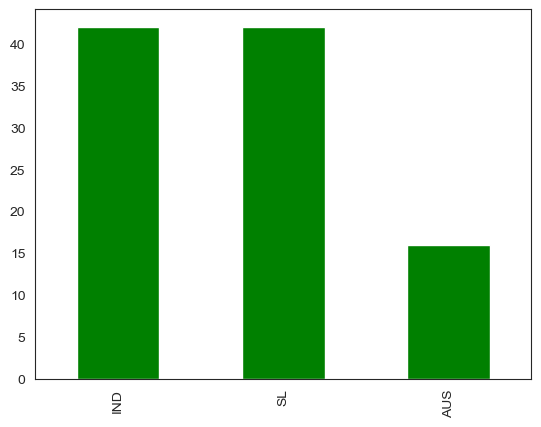

In [31]:
# counting the no of best players from the country wise
sorteddata["country"].head(100).value_counts().plot.bar(color="green")
plt.show()

# Analysing team wise 

In [32]:
# grouping by country wise 
a=data.groupby("country")

In [33]:
a.ngroups

13

# India

In [ ]:
# analysing the indian team.

In [35]:
india=a.get_group("IND")

In [36]:
india

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
0,SR Tendulkar,IND,1989-2012,296,294,20,11663,200,42.56,13663,85.36,31,61,12,1989,2012
1,V Kohli,IND,2008-2023,218,215,27,10690,166,56.86,11305,94.55,42,50,14,2008,2023
5,MS Dhoni,IND,2004-2019,260,233,65,8769,183,52.19,10007,87.62,8,62,6,2004,2019
11,RG Sharma,IND,2007-2023,182,179,21,7510,264,47.53,8229,91.26,22,35,10,2007,2023
17,Yuvraj Singh,IND,2000-2017,213,202,26,6776,150,38.50,7720,87.77,13,40,10,2000,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,SM Gavaskar,IND,1974-1987,69,67,8,2155,103,36.52,3393,63.51,1,18,3,1974,1987
2776,RA Jadeja,IND,2009-2023,126,94,34,1982,87,33.03,2323,85.32,0,11,6,2009,2023
2788,VG Kambli,IND,1993-2000,62,62,15,1867,106,39.72,2479,75.31,2,11,2,1993,2000
2795,M Kaif,IND,2002-2006,87,81,13,1797,87,26.42,2556,70.30,0,13,7,2002,2006


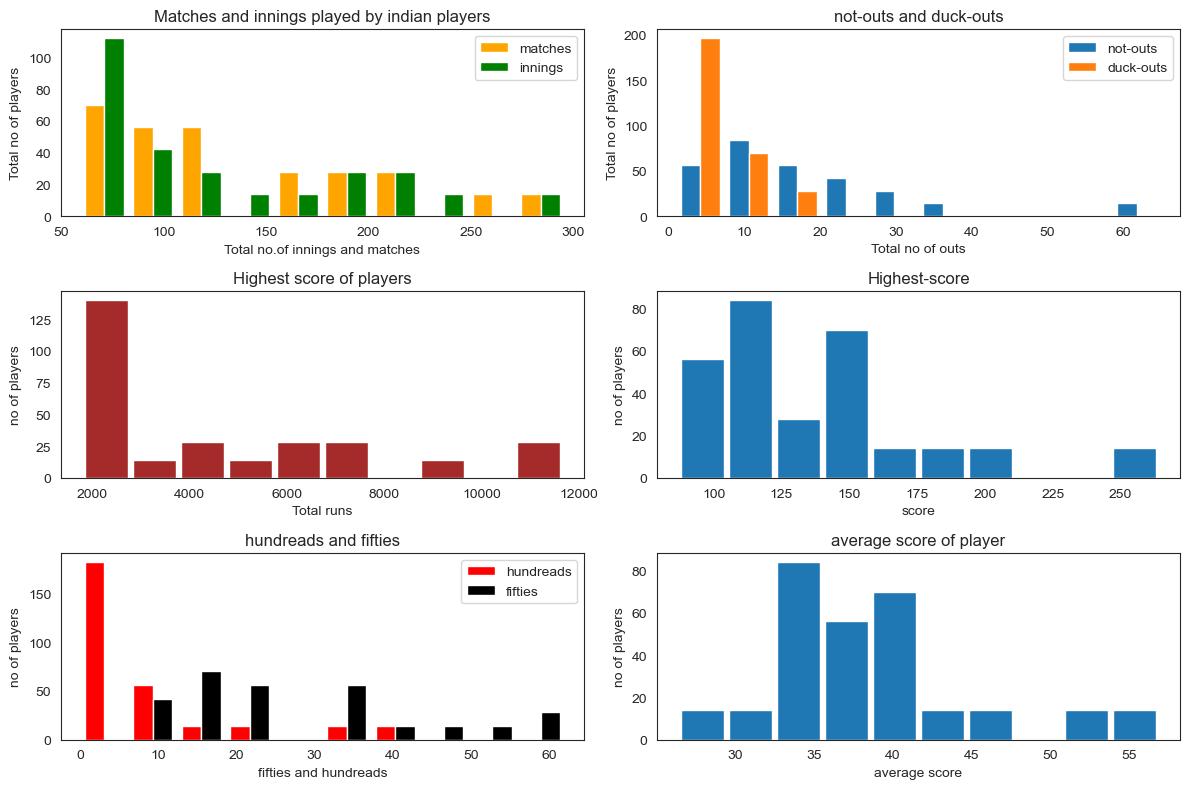

In [38]:
# plotting the bar plot
fig, ax = plt.subplots(3, 2, figsize=(12,8))

ax[0, 0].set_xlabel("Total no.of innings and matches")
ax[0, 0].set_ylabel("Total no of players")
ax[0, 0].set_title("Matches and innings played by indian players")
ax[0, 0].hist(india[["matches_played","innings"]],rwidth=0.8,color=["orange","green"],label=["matches","innings"])
ax[0, 0].legend()

ax[0, 1].set_xlabel("Total no of outs")
ax[0, 1].set_ylabel("Total no of players")
ax[0, 1].set_title("not-outs and duck-outs")
ax[0, 1].hist(india[["not_outs","ducks"]],rwidth=0.8,label=["not-outs","duck-outs"])
ax[0, 1].legend()

ax[1, 0].set_xlabel("Total runs")
ax[1, 0].set_ylabel("no of players")
ax[1, 0].set_title("Highest score of players")
ax[1, 0].hist(india["total_runs"],rwidth=0.9,color="brown")

ax[1, 1].set_xlabel("score")
ax[1, 1].set_ylabel("no of players")
ax[1, 1].set_title("Highest-score")
ax[1, 1].hist(india["highest_score"],rwidth=0.9)

ax[2, 0].set_xlabel("fifties and hundreads")
ax[2, 0].set_ylabel("no of players")
ax[2, 0].set_title("hundreads and fifties")
ax[2, 0].hist(india[["hundreads","fifties"]],rwidth=0.8,color=["red","black"],label=["hundreads","fifties"])
ax[2, 0].legend()

ax[2, 1].set_xlabel("average score")
ax[2, 1].set_ylabel("no of players")
ax[2, 1].set_title("average score of player")
ax[2, 1].hist(india["average"],rwidth=0.9)

plt.tight_layout()
plt.show()

- 300 innings and matches played players are high in india,highest no of innings played by an indian player is more than 100.
- More than 150+ players who got duck out more than 5 times and average 10 players who didn't duck out 
- there are 125 players of india whos score is grater than 2000,and the highest score of indian players is 11900.
- india has 115 players who's score is greater than 80 and 10 players who's score more than 250.
- the average score of more indian players is 80.


<AxesSubplot:>

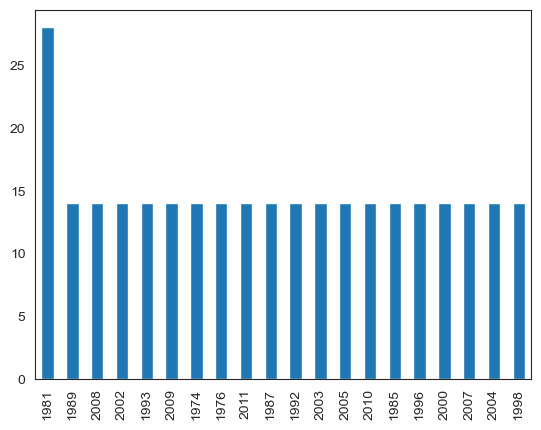

In [39]:
# finding the indian players carrier staring year.
india["starting_year"].value_counts().plot.bar()


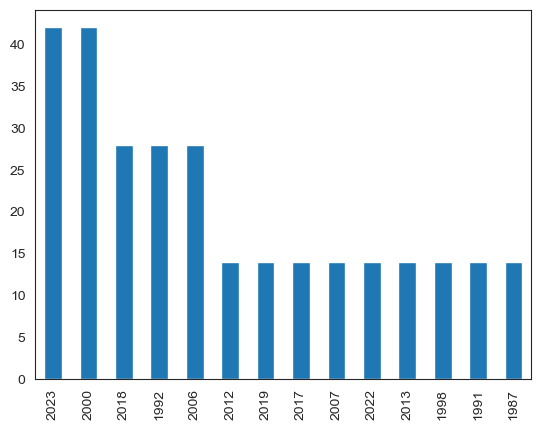

In [40]:
# indian players carrior ending years.
india["ending_year"].value_counts().plot.bar()
plt.show()

In [43]:
# sorting the column values to get top players based on the column vallues.
ind=india.sort_values(["total_runs","highest_score","average","hundreads","fifties","matches_played","innings"],ascending=False)

In [44]:
# top 10 players from india
ind.drop_duplicates().head(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
0,SR Tendulkar,IND,1989-2012,296,294,20,11663,200,42.56,13663,85.36,31,61,12,1989,2012
1,V Kohli,IND,2008-2023,218,215,27,10690,166,56.86,11305,94.55,42,50,14,2008,2023
5,MS Dhoni,IND,2004-2019,260,233,65,8769,183,52.19,10007,87.62,8,62,6,2004,2019
11,RG Sharma,IND,2007-2023,182,179,21,7510,264,47.53,8229,91.26,22,35,10,2007,2023
17,Yuvraj Singh,IND,2000-2017,213,202,26,6776,150,38.50,7720,87.77,13,40,10,2000,2017
21,SC Ganguly,IND,1996-2007,169,169,9,6546,153,40.91,8776,74.58,10,47,11,1996,2007
31,M Azharuddin,IND,1985-2000,195,181,32,5785,153,38.82,7542,76.70,4,37,4,1985,2000
50,S Dhawan,IND,2010-2022,129,128,8,4891,143,40.75,5366,91.14,9,32,5,2010,2022
70,SK Raina,IND,2005-2018,171,150,23,4222,100,33.24,4612,91.54,1,33,14,2005,2018
78,G Gambhir,IND,2003-2013,114,113,8,4007,150,38.16,4718,84.93,9,23,8,2003,2013


In [45]:
# top 10 average players from india.
ind.drop_duplicates().tail(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
130,NS Sidhu,IND,1987-1998,81,78,6,2671,134,37.09,3838,69.59,4,20,5,1987,1998
131,K Srikkanth,IND,1981-1992,89,89,3,2664,123,30.97,3687,72.25,3,17,6,1981,1992
145,AM Rahane,IND,2011-2018,74,72,1,2458,111,34.61,3109,79.06,3,20,5,2011,2018
152,DB Vengsarkar,IND,1976-1991,84,79,11,2318,105,34.08,3368,68.82,1,13,4,1976,1991
158,RJ Shastri,IND,1981-1992,95,80,14,2226,109,33.72,3426,64.97,4,13,3,1981,1992
163,SM Gavaskar,IND,1974-1987,69,67,8,2155,103,36.52,3393,63.51,1,18,3,1974,1987
176,RA Jadeja,IND,2009-2023,126,94,34,1982,87,33.03,2323,85.32,0,11,6,2009,2023
188,VG Kambli,IND,1993-2000,62,62,15,1867,106,39.72,2479,75.31,2,11,2,1993,2000
195,M Kaif,IND,2002-2006,87,81,13,1797,87,26.42,2556,70.30,0,13,7,2002,2006
197,VVS Laxman,IND,1998-2006,60,59,4,1790,107,32.54,2462,72.70,5,8,2,1998,2006


# AUSTRALIA

In [ ]:
# analysing the australia team.

In [46]:
australia=a.get_group("AUS")

In [47]:
australia

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
2,RT Ponting,AUS,1995-2012,277,273,28,10401,164,42.45,12851,80.93,23,64,15,1995,2012
9,AC Gilchrist,AUS,1997-2008,219,212,6,7551,172,36.65,7730,97.68,15,40,14,1997,2008
15,ME Waugh,AUS,1988-2002,199,192,15,6841,173,38.64,8926,76.64,15,41,13,1988,2002
24,MJ Clarke,AUS,2003-2015,193,181,33,6192,117,41.83,7928,78.10,6,44,10,2003,2015
30,SR Waugh,AUS,1986-2002,258,234,46,5845,114,31.09,7662,76.28,2,31,14,1986,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2767,GS Chappell,AUS,1971-1983,67,66,13,2123,138,40.05,2823,75.20,3,12,7,1971,1983
2781,GM Wood,AUS,1978-1989,69,65,9,1958,114,34.96,3264,59.98,3,10,4,1978,1989
2784,TM Head,AUS,2016-2023,51,51,4,1912,152,40.68,1975,96.81,3,14,2,2016,2023
2786,CL White,AUS,2005-2018,78,67,13,1891,105,35.01,2290,82.57,2,10,4,2005,2018


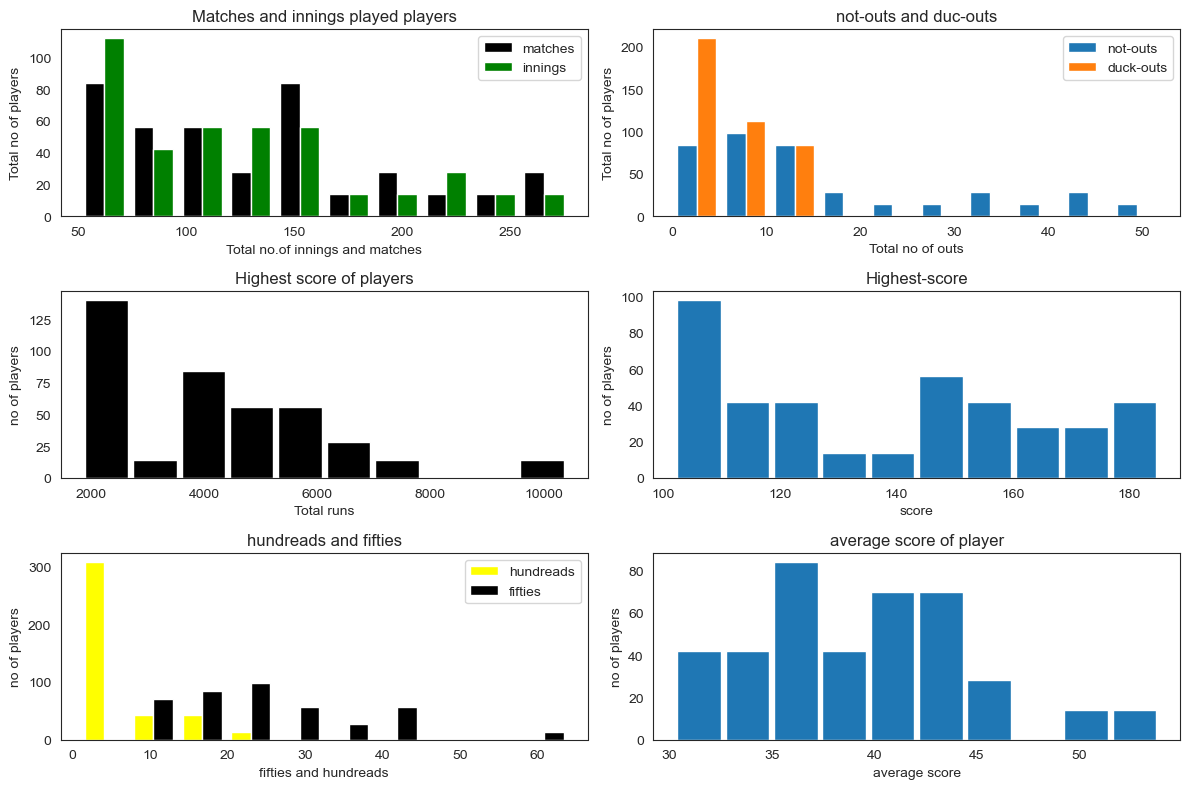

In [48]:
# plotting the bar plot
fig, ax = plt.subplots(3, 2, figsize=(12,8))

ax[0, 0].set_xlabel("Total no.of innings and matches")
ax[0, 0].set_ylabel("Total no of players")
ax[0, 0].set_title("Matches and innings played players")
ax[0, 0].hist(australia[["matches_played","innings"]],rwidth=0.8,color=["black","green"],label=["matches","innings"])
ax[0, 0].legend()

ax[0, 1].set_xlabel("Total no of outs")
ax[0, 1].set_ylabel("Total no of players")
ax[0, 1].set_title("not-outs and duc-outs")
ax[0, 1].hist(australia[["not_outs","ducks"]],rwidth=0.8,label=["not-outs","duck-outs"])
ax[0, 1].legend()

ax[1, 0].set_xlabel("Total runs")
ax[1, 0].set_ylabel("no of players")
ax[1, 0].set_title("Highest score of players")
ax[1, 0].hist(australia["total_runs"],rwidth=0.9,color="black")

ax[1, 1].set_xlabel("score")
ax[1, 1].set_ylabel("no of players")
ax[1, 1].set_title("Highest-score")
ax[1, 1].hist(australia["highest_score"],rwidth=0.9)

ax[2, 0].set_xlabel("fifties and hundreads")
ax[2, 0].set_ylabel("no of players")
ax[2, 0].set_title("hundreads and fifties")
ax[2, 0].hist(australia[["hundreads","fifties"]],rwidth=0.8,color=["yellow","black"],label=["hundreads","fifties"])
ax[2, 0].legend()

ax[2, 1].set_xlabel("average score")
ax[2, 1].set_ylabel("no of players")
ax[2, 1].set_title("average score of player")
ax[2, 1].hist(australia["average"],rwidth=0.9)

plt.tight_layout()
plt.show()

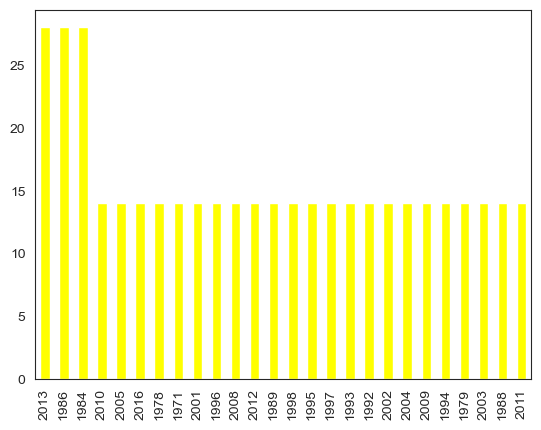

In [49]:
australia["starting_year"].value_counts().plot.bar(color="yellow")
plt.show()

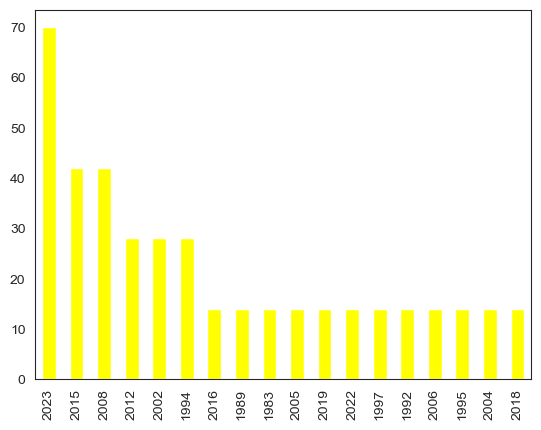

In [50]:
australia["ending_year"].value_counts().plot.bar(color="yellow")
plt.show()

In [51]:
# sorting the column values to get top players based on the column vallues.
aus=australia.sort_values(["total_runs","highest_score","average","hundreads","fifties","matches_played","innings"],ascending=False)

In [52]:
# top 10 best players from australia
aus.drop_duplicates().head(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
2,RT Ponting,AUS,1995-2012,277,273,28,10401,164,42.45,12851,80.93,23,64,15,1995,2012
9,AC Gilchrist,AUS,1997-2008,219,212,6,7551,172,36.65,7730,97.68,15,40,14,1997,2008
15,ME Waugh,AUS,1988-2002,199,192,15,6841,173,38.64,8926,76.64,15,41,13,1988,2002
24,MJ Clarke,AUS,2003-2015,193,181,33,6192,117,41.83,7928,78.10,6,44,10,2003,2015
30,SR Waugh,AUS,1986-2002,258,234,46,5845,114,31.09,7662,76.28,2,31,14,1986,2002
32,AR Border,AUS,1979-1994,235,223,36,5785,127,30.93,8185,70.67,3,36,10,1979,1994
39,DM Jones,AUS,1984-1994,145,143,23,5394,145,44.95,7444,72.46,6,40,5,1984,1994
42,MG Bevan,AUS,1994-2004,171,150,52,5279,108,53.86,7119,74.15,5,32,4,1994,2004
47,DA Warner,AUS,2009-2023,119,119,4,4967,179,43.19,5114,97.12,15,23,3,2009,2023
49,DC Boon,AUS,1984-1995,150,149,13,4921,122,36.18,7570,65.00,5,29,4,1984,1995


In [53]:
# top 10 average players of australia.
aus.drop_duplicates().tail(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
127,GJ Maxwell,AUS,2013-2023,97,91,10,2683,108,33.12,2148,124.90,2,17,7,2013,2023
133,GJ Bailey,AUS,2012-2016,71,70,9,2578,156,42.26,3037,84.88,3,18,2,2012,2016
137,SE Marsh,AUS,2008-2019,64,64,2,2549,151,41.11,3119,81.72,7,13,3,2008,2019
146,DS Lehmann,AUS,1996-2005,81,73,16,2455,119,43.07,2957,83.02,4,14,3,1996,2005
156,BJ Haddin,AUS,2001-2015,95,87,12,2271,110,30.28,2643,85.92,2,10,1,2001,2015
167,GS Chappell,AUS,1971-1983,67,66,13,2123,138,40.05,2823,75.20,3,12,7,1971,1983
181,GM Wood,AUS,1978-1989,69,65,9,1958,114,34.96,3264,59.98,3,10,4,1978,1989
184,TM Head,AUS,2016-2023,51,51,4,1912,152,40.68,1975,96.81,3,14,2,2016,2023
186,CL White,AUS,2005-2018,78,67,13,1891,105,35.01,2290,82.57,2,10,4,2005,2018
193,MR Marsh,AUS,2011-2023,62,61,9,1846,102,35.50,2000,92.30,1,14,4,2011,2023


# PAKISTAN

In [54]:
# analysing the pakistan team
pak=a.get_group("PAK")

In [55]:
pak

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
25,Mohammad Yousuf,PAK,1998-2010,172,165,26,6081,141,43.74,7923,76.75,11,45,10,1998,2010
52,Shoaib Malik,PAK,2000-2019,175,159,27,4748,125,35.96,5608,84.66,5,29,7,2000,2019
54,Younis Khan,PAK,2000-2015,152,149,11,4671,123,33.84,6171,75.69,3,33,9,2000,2015
58,Javed Miandad,PAK,1976-1996,138,132,28,4507,119,43.33,6600,68.28,7,27,2,1976,1996
75,Mohammad Hafeez,PAK,2003-2019,130,129,6,4079,139,33.16,5332,76.50,6,28,14,2003,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2770,Kamran Akmal,PAK,2002-2017,109,94,8,2099,109,24.40,2474,84.84,3,6,9,2002,2017
2771,Fakhar Zaman,PAK,2017-2023,41,41,4,2079,210,56.18,2212,93.98,7,11,2,2017,2023
2774,Imran Khan,PAK,1974-1992,99,83,24,2006,82,34.00,2910,68.93,0,9,0,1974,1992
2777,Wasim Akram,PAK,1984-2002,184,141,23,1974,86,16.72,2196,89.89,0,4,19,1984,2002


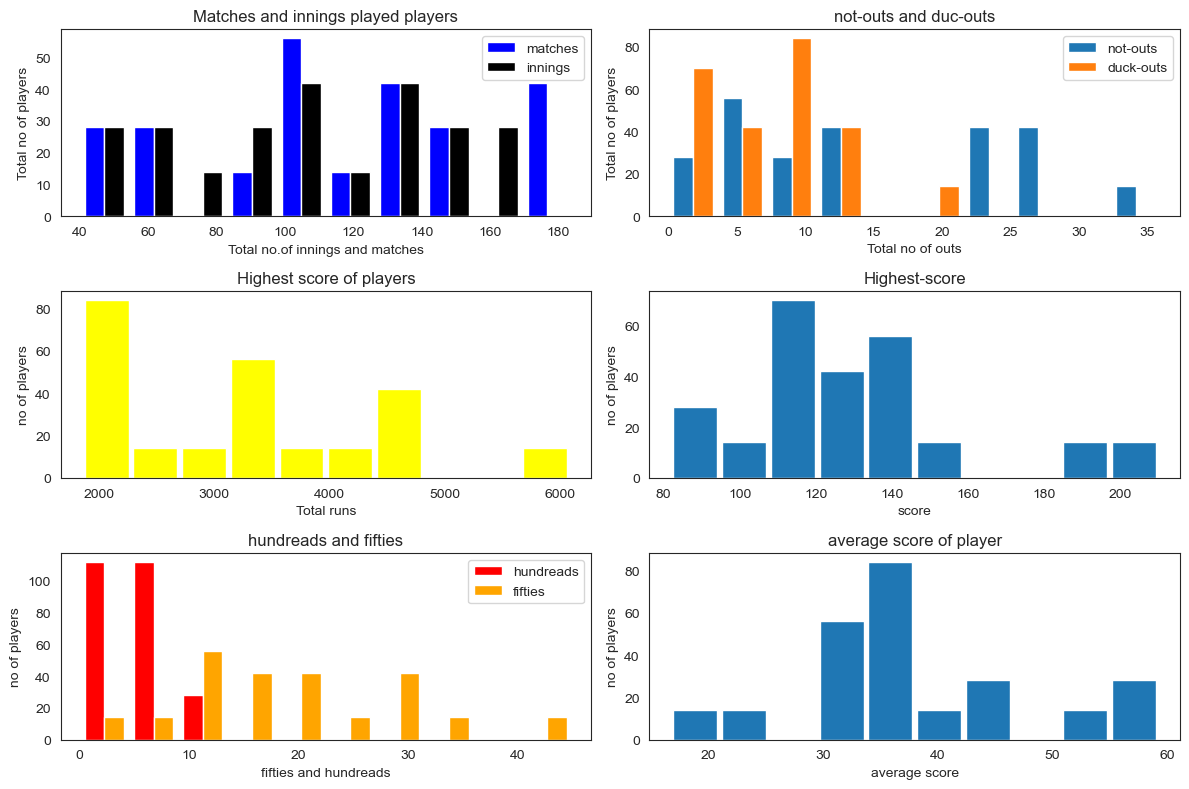

In [56]:
# plotting the bar plot.
fig, ax = plt.subplots(3, 2, figsize=(12,8))

ax[0, 0].set_xlabel("Total no.of innings and matches")
ax[0, 0].set_ylabel("Total no of players")
ax[0, 0].set_title("Matches and innings played players")
ax[0, 0].hist(pak[["matches_played","innings"]],rwidth=0.8,color=["blue","black"],label=["matches","innings"])
ax[0, 0].legend()

ax[0, 1].set_xlabel("Total no of outs")
ax[0, 1].set_ylabel("Total no of players")
ax[0, 1].set_title("not-outs and duc-outs")
ax[0, 1].hist(pak[["not_outs","ducks"]],rwidth=0.8,label=["not-outs","duck-outs"])
ax[0, 1].legend()

ax[1, 0].set_xlabel("Total runs")
ax[1, 0].set_ylabel("no of players")
ax[1, 0].set_title("Highest score of players")
ax[1, 0].hist(pak["total_runs"],rwidth=0.9,color="yellow")

ax[1, 1].set_xlabel("score")
ax[1, 1].set_ylabel("no of players")
ax[1, 1].set_title("Highest-score")
ax[1, 1].hist(pak["highest_score"],rwidth=0.9)

ax[2, 0].set_xlabel("fifties and hundreads")
ax[2, 0].set_ylabel("no of players")
ax[2, 0].set_title("hundreads and fifties")
ax[2, 0].hist(pak[["hundreads","fifties"]],rwidth=0.8,color=["red","orange"],label=["hundreads","fifties"])
ax[2, 0].legend()

ax[2, 1].set_xlabel("average score")
ax[2, 1].set_ylabel("no of players")
ax[2, 1].set_title("average score of player")
ax[2, 1].hist(pak["average"],rwidth=0.9)

plt.tight_layout()
plt.show()

In [57]:
# sorting the column values to get top players based on the column vallues.
pakistan=pak.sort_values(["total_runs","highest_score","average","hundreads","fifties","matches_played","innings"],ascending=False)


In [59]:
# top 10 best players of pakistan
pakistan.drop_duplicates().head(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
25,Mohammad Yousuf,PAK,1998-2010,172,165,26,6081,141,43.74,7923,76.75,11,45,10,1998,2010
52,Shoaib Malik,PAK,2000-2019,175,159,27,4748,125,35.96,5608,84.66,5,29,7,2000,2019
54,Younis Khan,PAK,2000-2015,152,149,11,4671,123,33.84,6171,75.69,3,33,9,2000,2015
58,Javed Miandad,PAK,1976-1996,138,132,28,4507,119,43.33,6600,68.28,7,27,2,1976,1996
75,Mohammad Hafeez,PAK,2003-2019,130,129,6,4079,139,33.16,5332,76.50,6,28,14,2003,2019
88,Saleem Malik,PAK,1982-1998,147,131,22,3749,102,34.39,4920,76.19,2,26,10,1982,1998
96,Saeed Anwar,PAK,1989-2002,109,108,11,3430,194,35.36,4290,79.95,5,18,13,1989,2002
103,Ijaz Ahmed,PAK,1986-2000,118,110,13,3281,139,33.82,4010,81.82,7,16,9,1986,2000
105,Ramiz Raja,PAK,1985-1997,106,106,6,3164,119,31.64,4797,65.95,4,18,10,1985,1997
106,Babar Azam,PAK,2015-2023,62,61,8,3141,158,59.26,3432,91.52,11,16,2,2015,2023


In [60]:
# top 10 average players of pakistan
pakistan.drop_duplicates().tail(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
105,Ramiz Raja,PAK,1985-1997,106,106,6,3164,119,31.64,4797,65.95,4,18,10,1985,1997
106,Babar Azam,PAK,2015-2023,62,61,8,3141,158,59.26,3432,91.52,11,16,2,2015,2023
113,Abdul Razzaq,PAK,1996-2011,136,123,36,2934,112,33.72,3414,85.94,2,14,5,1996,2011
139,Aamer Sohail,PAK,1991-2000,85,84,3,2533,111,31.27,3822,66.27,1,18,6,1991,2000
168,Salman Butt,PAK,2004-2010,56,56,3,2120,136,40.00,2670,79.40,7,10,11,2004,2010
170,Kamran Akmal,PAK,2002-2017,109,94,8,2099,109,24.40,2474,84.84,3,6,9,2002,2017
171,Fakhar Zaman,PAK,2017-2023,41,41,4,2079,210,56.18,2212,93.98,7,11,2,2017,2023
174,Imran Khan,PAK,1974-1992,99,83,24,2006,82,34.00,2910,68.93,0,9,0,1974,1992
177,Wasim Akram,PAK,1984-2002,184,141,23,1974,86,16.72,2196,89.89,0,4,19,1984,2002
191,Zaheer Abbas,PAK,1974-1985,41,40,4,1854,123,51.50,1978,93.73,6,10,1,1974,1985


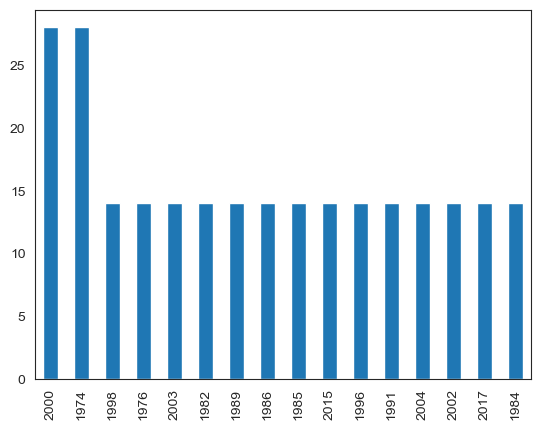

In [61]:
pak["starting_year"].value_counts().plot.bar()
plt.show()

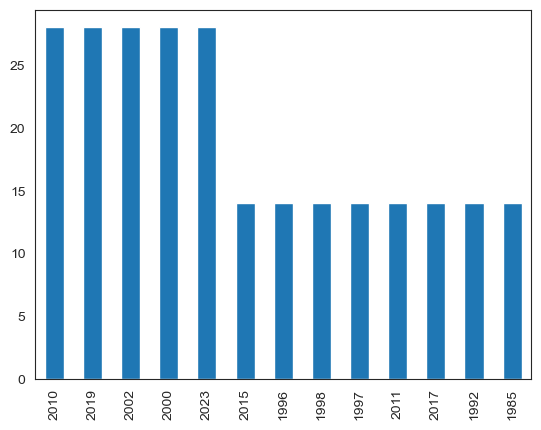

In [62]:
pak["ending_year"].value_counts().plot.bar()
plt.show()

# ENGLAND

In [63]:
# analysing the england team
eng=a.get_group("ENG")

In [64]:
eng

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
28,JE Root,ENG,2013-2022,139,136,21,5860,133,50.95,6743,86.90,15,34,6,2013,2022
59,IR Bell,ENG,2004-2015,131,128,9,4438,141,37.29,5662,78.38,4,27,4,2004,2015
65,JC Buttler,ENG,2013-2023,147,129,23,4275,162,40.33,3660,116.80,10,22,12,2013,2023
72,PD Collingwood,ENG,2001-2011,162,151,30,4146,120,34.26,5407,76.67,3,23,6,2001,2011
76,JJ Roy,ENG,2015-2023,105,104,2,4079,180,39.99,3831,106.47,11,20,10,2015,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760,AD Hales,ENG,2014-2019,60,59,2,2174,171,38.14,2250,96.62,5,14,4,2014,2019
2773,MM Ali,ENG,2014-2023,115,95,13,2012,119,24.53,2005,100.34,2,6,6,2014,2023
2779,RA Smith,ENG,1988-1996,53,53,4,1966,167,40.12,2777,70.79,4,11,2,1988,1996
2789,N Hussain,ENG,1990-2003,68,68,9,1864,115,31.59,2772,67.24,1,12,5,1990,2003


In [65]:
# plotting the bar plot

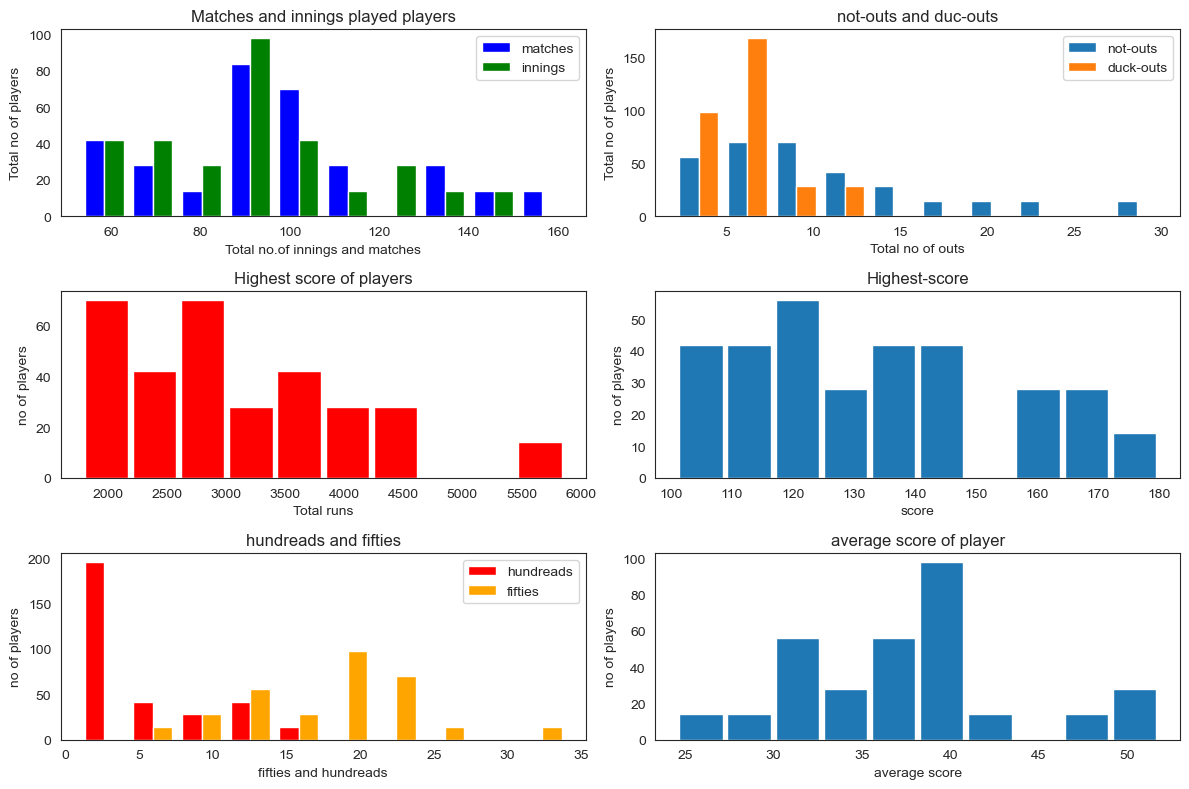

In [66]:
fig, ax = plt.subplots(3, 2, figsize=(12,8))

ax[0, 0].set_xlabel("Total no.of innings and matches")
ax[0, 0].set_ylabel("Total no of players")
ax[0, 0].set_title("Matches and innings played players")
ax[0, 0].hist(eng[["matches_played","innings"]],rwidth=0.8,color=["blue","green"],label=["matches","innings"])
ax[0, 0].legend()

ax[0, 1].set_xlabel("Total no of outs")
ax[0, 1].set_ylabel("Total no of players")
ax[0, 1].set_title("not-outs and duc-outs")
ax[0, 1].hist(eng[["not_outs","ducks"]],rwidth=0.8,label=["not-outs","duck-outs"])
ax[0, 1].legend()

ax[1, 0].set_xlabel("Total runs")
ax[1, 0].set_ylabel("no of players")
ax[1, 0].set_title("Highest score of players")
ax[1, 0].hist(eng["total_runs"],rwidth=0.9,color="red")

ax[1, 1].set_xlabel("score")
ax[1, 1].set_ylabel("no of players")
ax[1, 1].set_title("Highest-score")
ax[1, 1].hist(eng["highest_score"],rwidth=0.9)

ax[2, 0].set_xlabel("fifties and hundreads")
ax[2, 0].set_ylabel("no of players")
ax[2, 0].set_title("hundreads and fifties")
ax[2, 0].hist(eng[["hundreads","fifties"]],rwidth=0.8,color=["red","orange"],label=["hundreads","fifties"])
ax[2, 0].legend()

ax[2, 1].set_xlabel("average score")
ax[2, 1].set_ylabel("no of players")
ax[2, 1].set_title("average score of player")
ax[2, 1].hist(eng["average"],rwidth=0.9)

plt.tight_layout()
plt.show()


In [67]:
# sorting the column values to get top players based on the column vallues.
england=eng.sort_values(["total_runs","highest_score","average","hundreads","fifties","matches_played","innings"],ascending=False)

In [68]:
# top 10 best players of england
england.drop_duplicates().head(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
28,JE Root,ENG,2013-2022,139,136,21,5860,133,50.95,6743,86.90,15,34,6,2013,2022
59,IR Bell,ENG,2004-2015,131,128,9,4438,141,37.29,5662,78.38,4,27,4,2004,2015
65,JC Buttler,ENG,2013-2023,147,129,23,4275,162,40.33,3660,116.80,10,22,12,2013,2023
72,PD Collingwood,ENG,2001-2011,162,151,30,4146,120,34.26,5407,76.67,3,23,6,2001,2011
76,JJ Roy,ENG,2015-2023,105,104,2,4079,180,39.99,3831,106.47,11,20,10,2015,2023
87,ME Trescothick,ENG,2000-2006,103,103,5,3794,137,38.71,4440,85.45,11,19,12,2000,2006
90,AJ Strauss,ENG,2003-2011,107,107,7,3706,158,37.06,4539,81.64,6,23,7,2003,2011
93,JM Bairstow,ENG,2011-2022,86,84,7,3600,141,46.75,3459,104.07,11,15,7,2011,2022
97,AJ Stewart,ENG,1989-2003,118,115,8,3383,103,31.61,4988,67.82,3,21,10,1989,2003
98,GA Gooch,ENG,1976-1995,93,92,5,3360,142,38.62,5380,62.45,8,15,2,1976,1995


In [69]:
# top 10 average players of england
england.drop_duplicates().tail(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
124,NV Knight,ENG,1996-2003,72,72,8,2773,125,43.32,3833,72.34,5,19,6,1996,2003
126,GA Hick,ENG,1991-2001,86,85,11,2697,109,36.44,3683,73.22,3,19,7,1991,2001
142,IJL Trott,ENG,2009-2013,57,56,8,2486,137,51.79,3243,76.65,4,19,4,2009,2013
147,DI Gower,ENG,1978-1991,93,91,7,2410,130,28.69,3382,71.25,4,11,5,1978,1991
153,RS Bopara,ENG,2007-2015,99,95,18,2310,101,30.00,2945,78.43,1,10,3,2007,2015
160,AD Hales,ENG,2014-2019,60,59,2,2174,171,38.14,2250,96.62,5,14,4,2014,2019
173,MM Ali,ENG,2014-2023,115,95,13,2012,119,24.53,2005,100.34,2,6,6,2014,2023
179,RA Smith,ENG,1988-1996,53,53,4,1966,167,40.12,2777,70.79,4,11,2,1988,1996
189,N Hussain,ENG,1990-2003,68,68,9,1864,115,31.59,2772,67.24,1,12,5,1990,2003
198,MW Gatting,ENG,1977-1993,78,74,15,1786,115,30.27,2578,69.27,1,8,4,1977,1993


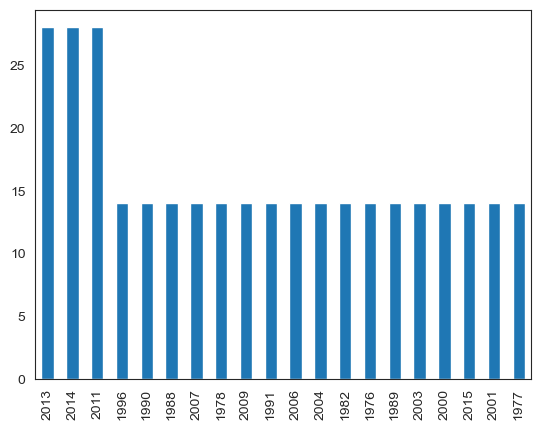

In [70]:
eng["starting_year"].value_counts().plot.bar()
plt.show()

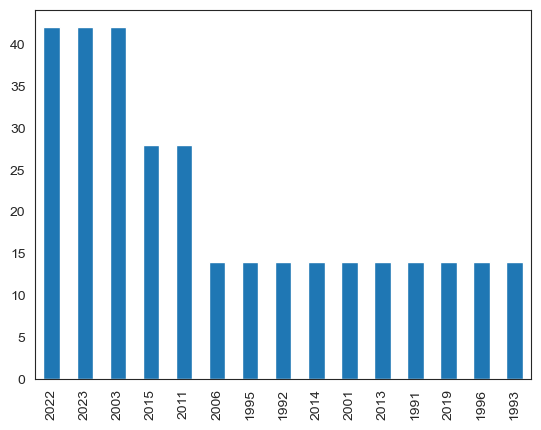

In [71]:
eng["ending_year"].value_counts().plot.bar()
plt.show()

# WEST-INDIES

In [72]:
# analysing the west-indies team
wi=a.get_group("WI")

In [73]:
wi

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
26,S Chanderpaul,WI,1994-2011,169,161,25,6017,150,44.24,8258,72.86,10,40,4,1994,2011
35,DL Haynes,WI,1978-1994,147,147,17,5521,152,42.46,8458,65.27,12,36,7,1978,1994
51,MN Samuels,WI,2001-2018,162,158,20,4791,126,34.71,6258,76.55,9,27,8,2001,2018
53,IVA Richards,WI,1975-1991,119,107,17,4694,189,52.15,5061,92.74,9,34,5,1975,1991
69,RR Sarwan,WI,2000-2013,127,120,20,4227,120,42.27,5564,75.97,5,28,7,2000,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,PV Simmons,WI,1987-1999,81,80,8,2474,122,34.36,3498,70.72,4,13,7,1987,1999
2749,KA Pollard,WI,2007-2022,105,98,9,2363,119,26.55,2540,93.03,3,11,14,2007,2022
2785,D Ramdin,WI,2005-2016,119,97,18,1902,169,24.07,2328,81.70,2,6,3,2005,2016
2787,WW Hinds,WI,1999-2010,72,70,9,1869,127,30.63,2685,69.60,4,8,6,1999,2010


In [74]:
# plotting the bar plot

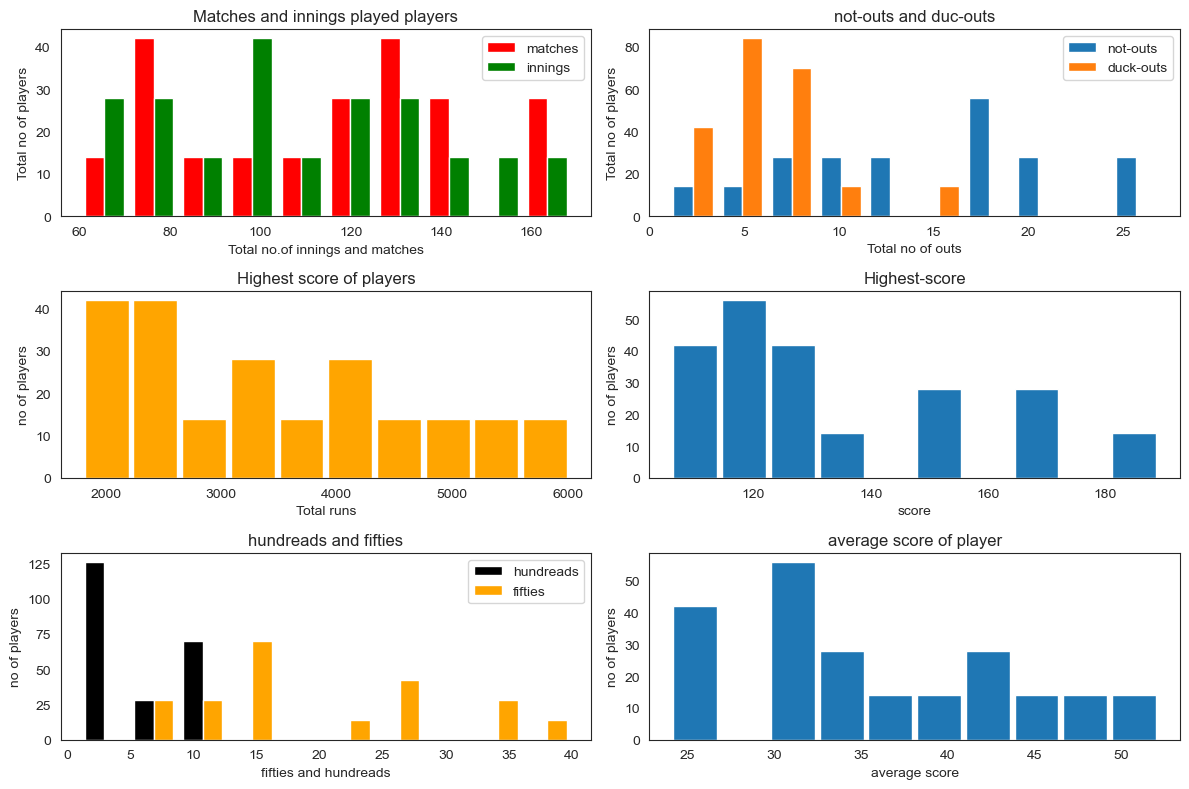

In [75]:
fig, ax = plt.subplots(3, 2, figsize=(12,8))

ax[0, 0].set_xlabel("Total no.of innings and matches")
ax[0, 0].set_ylabel("Total no of players")
ax[0, 0].set_title("Matches and innings played players")
ax[0, 0].hist(wi[["matches_played","innings"]],rwidth=0.8,color=["red","green"],label=["matches","innings"])
ax[0, 0].legend()

ax[0, 1].set_xlabel("Total no of outs")
ax[0, 1].set_ylabel("Total no of players")
ax[0, 1].set_title("not-outs and duc-outs")
ax[0, 1].hist(wi[["not_outs","ducks"]],rwidth=0.8,label=["not-outs","duck-outs"])
ax[0, 1].legend()

ax[1, 0].set_xlabel("Total runs")
ax[1, 0].set_ylabel("no of players")
ax[1, 0].set_title("Highest score of players")
ax[1, 0].hist(wi["total_runs"],rwidth=0.9,color="orange")

ax[1, 1].set_xlabel("score")
ax[1, 1].set_ylabel("no of players")
ax[1, 1].set_title("Highest-score")
ax[1, 1].hist(wi["highest_score"],rwidth=0.9)

ax[2, 0].set_xlabel("fifties and hundreads")
ax[2, 0].set_ylabel("no of players")
ax[2, 0].set_title("hundreads and fifties")
ax[2, 0].hist(wi[["hundreads","fifties"]],rwidth=0.8,color=["black","orange"],label=["hundreads","fifties"])
ax[2, 0].legend()

ax[2, 1].set_xlabel("average score")
ax[2, 1].set_ylabel("no of players")
ax[2, 1].set_title("average score of player")
ax[2, 1].hist(wi["average"],rwidth=0.9)

plt.tight_layout()
plt.show()

In [76]:
# sorting the column values to get top players based on the column vallues.
westindies=wi.sort_values(["total_runs","highest_score","average","hundreads","fifties","matches_played","innings"],ascending=False)

In [77]:
#top 10 best players of westindies
westindies.drop_duplicates().head(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
26,S Chanderpaul,WI,1994-2011,169,161,25,6017,150,44.24,8258,72.86,10,40,4,1994,2011
35,DL Haynes,WI,1978-1994,147,147,17,5521,152,42.46,8458,65.27,12,36,7,1978,1994
51,MN Samuels,WI,2001-2018,162,158,20,4791,126,34.71,6258,76.55,9,27,8,2001,2018
53,IVA Richards,WI,1975-1991,119,107,17,4694,189,52.15,5061,92.74,9,34,5,1975,1991
69,RR Sarwan,WI,2000-2013,127,120,20,4227,120,42.27,5564,75.97,5,28,7,2000,2013
81,CL Hooper,WI,1987-2003,145,133,27,3951,113,37.27,5117,77.21,3,24,3,1987,2003
85,RB Richardson,WI,1983-1996,135,131,13,3817,110,32.34,5881,64.90,2,27,5,1983,1996
94,SD Hope,WI,2016-2023,79,79,7,3455,170,47.98,4479,77.13,12,15,4,2016,2023
107,CG Greenidge,WI,1975-1991,85,84,5,3132,133,39.64,4798,65.27,6,16,1,1975,1991
123,DM Bravo,WI,2009-2022,100,98,12,2778,124,32.30,3918,70.90,4,16,4,2009,2022


In [78]:
# top 10 average players of westindies.
westindies.drop_duplicates().tail(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
85,RB Richardson,WI,1983-1996,135,131,13,3817,110,32.34,5881,64.90,2,27,5,1983,1996
94,SD Hope,WI,2016-2023,79,79,7,3455,170,47.98,4479,77.13,12,15,4,2016,2023
107,CG Greenidge,WI,1975-1991,85,84,5,3132,133,39.64,4798,65.27,6,16,1,1975,1991
123,DM Bravo,WI,2009-2022,100,98,12,2778,124,32.30,3918,70.90,4,16,4,2009,2022
132,DJ Bravo,WI,2004-2014,135,123,19,2611,106,25.10,3126,83.52,1,10,10,2004,2014
144,PV Simmons,WI,1987-1999,81,80,8,2474,122,34.36,3498,70.72,4,13,7,1987,1999
149,KA Pollard,WI,2007-2022,105,98,9,2363,119,26.55,2540,93.03,3,11,14,2007,2022
185,D Ramdin,WI,2005-2016,119,97,18,1902,169,24.07,2328,81.70,2,6,3,2005,2016
187,WW Hinds,WI,1999-2010,72,70,9,1869,127,30.63,2685,69.60,4,8,6,1999,2010
196,LMP Simmons,WI,2006-2015,60,60,3,1797,122,31.52,2525,71.16,1,15,7,2006,2015


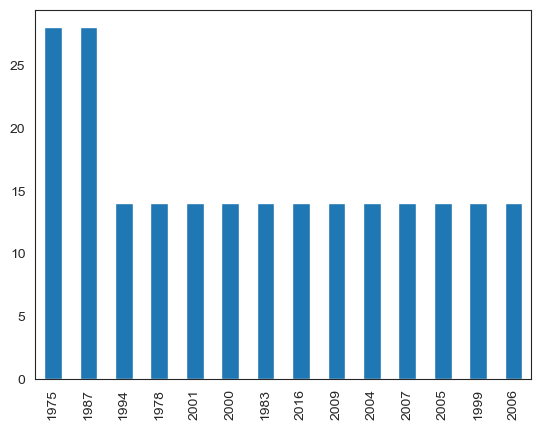

In [79]:
wi["starting_year"].value_counts().plot.bar()
plt.show()

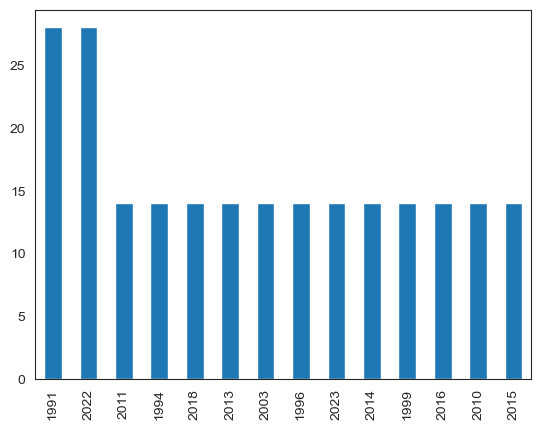

In [80]:
wi["ending_year"].value_counts().plot.bar()
plt.show()

# SOUTH AFRICA

In [82]:
# analysing the sout-africa team
sa=a.get_group("SA")

In [83]:
sa

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
20,HM Amla,SA,2008-2019,139,137,9,6561,154,51.25,7381,88.89,23,31,4,2008,2019
27,HH Gibbs,SA,1996-2010,181,177,8,5941,175,35.15,6988,85.01,15,25,15,1996,2010
33,GC Smith,SA,2002-2013,150,150,7,5646,141,39.48,6920,81.58,10,37,6,2002,2013
61,JN Rhodes,SA,1992-2003,172,158,37,4429,98,36.60,5511,80.36,0,27,8,1992,2003
63,G Kirsten,SA,1993-2003,122,122,10,4331,133,38.66,6079,71.24,7,32,7,1993,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2702,MV Boucher,SA,1998-2011,216,166,45,3295,147,27.23,3883,84.85,1,14,12,1998,2011
2708,DA Miller,SA,2010-2023,118,104,36,3124,139,45.94,2978,104.90,4,19,5,2010,2023
2736,L Klusener,SA,1996-2004,122,100,36,2559,103,39.98,2880,88.85,1,13,9,1996,2004
2743,HH Dippenaar,SA,1999-2006,72,64,11,2485,123,46.88,3655,67.98,3,18,1,1999,2006


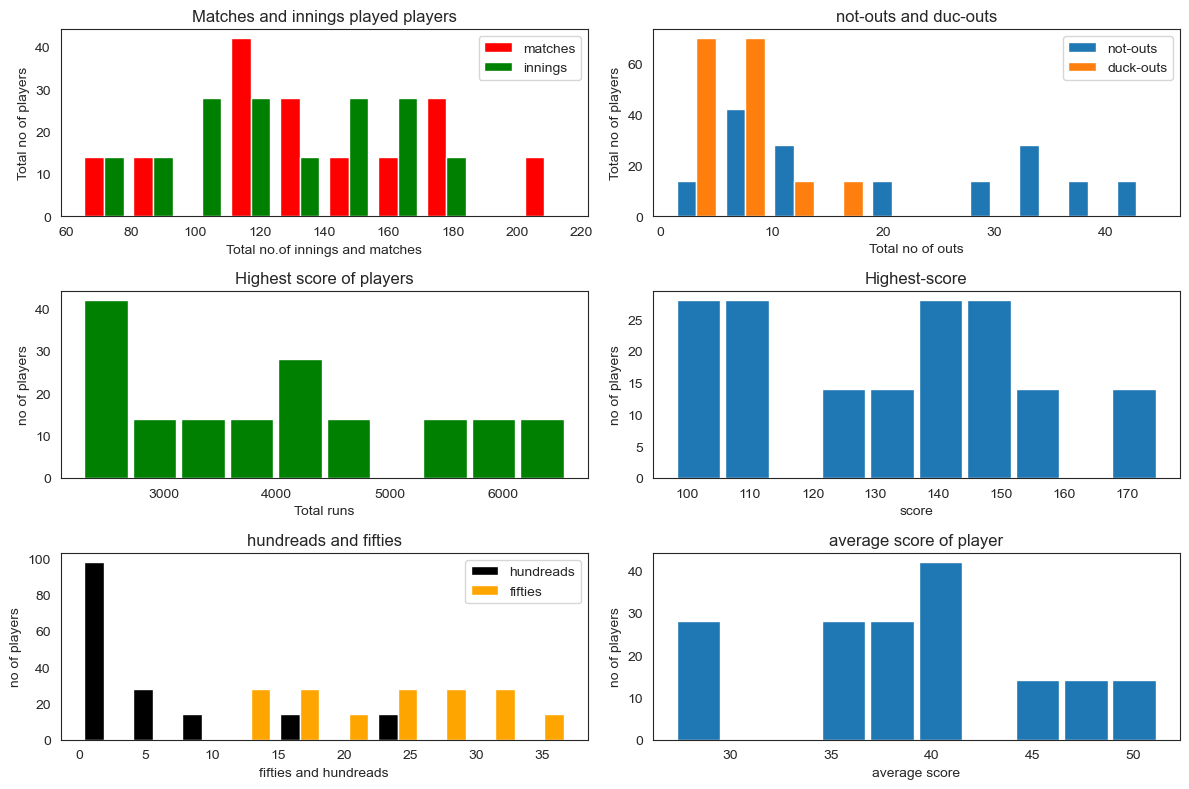

In [84]:
# plotting the bar plot
fig, ax = plt.subplots(3, 2, figsize=(12,8))

ax[0, 0].set_xlabel("Total no.of innings and matches")
ax[0, 0].set_ylabel("Total no of players")
ax[0, 0].set_title("Matches and innings played players")
ax[0, 0].hist(sa[["matches_played","innings"]],rwidth=0.8,color=["red","green"],label=["matches","innings"])
ax[0, 0].legend()

ax[0, 1].set_xlabel("Total no of outs")
ax[0, 1].set_ylabel("Total no of players")
ax[0, 1].set_title("not-outs and duc-outs")
ax[0, 1].hist(sa[["not_outs","ducks"]],rwidth=0.8,label=["not-outs","duck-outs"])
ax[0, 1].legend()

ax[1, 0].set_xlabel("Total runs")
ax[1, 0].set_ylabel("no of players")
ax[1, 0].set_title("Highest score of players")
ax[1, 0].hist(sa["total_runs"],rwidth=0.9,color="green")

ax[1, 1].set_xlabel("score")
ax[1, 1].set_ylabel("no of players")
ax[1, 1].set_title("Highest-score")
ax[1, 1].hist(sa["highest_score"],rwidth=0.9)

ax[2, 0].set_xlabel("fifties and hundreads")
ax[2, 0].set_ylabel("no of players")
ax[2, 0].set_title("hundreads and fifties")
ax[2, 0].hist(sa[["hundreads","fifties"]],rwidth=0.8,color=["black","orange"],label=["hundreads","fifties"])
ax[2, 0].legend()

ax[2, 1].set_xlabel("average score")
ax[2, 1].set_ylabel("no of players")
ax[2, 1].set_title("average score of player")
ax[2, 1].hist(sa["average"],rwidth=0.9)

plt.tight_layout()
plt.show()

In [85]:
# sorting the column values to get top players based on the column vallues.
southafrica=sa.sort_values(["total_runs","highest_score","average","hundreads","fifties","matches_played","innings"],ascending=False)

In [86]:
# top 10 best players from southafrica
southafrica.drop_duplicates().head(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
20,HM Amla,SA,2008-2019,139,137,9,6561,154,51.25,7381,88.89,23,31,4,2008,2019
27,HH Gibbs,SA,1996-2010,181,177,8,5941,175,35.15,6988,85.01,15,25,15,1996,2010
33,GC Smith,SA,2002-2013,150,150,7,5646,141,39.48,6920,81.58,10,37,6,2002,2013
61,JN Rhodes,SA,1992-2003,172,158,37,4429,98,36.60,5511,80.36,0,27,8,1992,2003
63,G Kirsten,SA,1993-2003,122,122,10,4331,133,38.66,6079,71.24,7,32,7,1993,2003
73,JP Duminy,SA,2004-2019,156,142,31,4134,150,37.24,4905,84.28,3,23,4,2004,2019
83,WJ Cronje,SA,1992-2000,125,120,21,3902,112,39.41,5274,73.98,1,28,4,1992,2000
102,MV Boucher,SA,1998-2011,216,166,45,3295,147,27.23,3883,84.85,1,14,12,1998,2011
108,DA Miller,SA,2010-2023,118,104,36,3124,139,45.94,2978,104.90,4,19,5,2010,2023
136,L Klusener,SA,1996-2004,122,100,36,2559,103,39.98,2880,88.85,1,13,9,1996,2004


In [87]:
# top 10 average players of southafrica
southafrica.drop_duplicates().tail(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
33,GC Smith,SA,2002-2013,150,150,7,5646,141,39.48,6920,81.58,10,37,6,2002,2013
61,JN Rhodes,SA,1992-2003,172,158,37,4429,98,36.60,5511,80.36,0,27,8,1992,2003
63,G Kirsten,SA,1993-2003,122,122,10,4331,133,38.66,6079,71.24,7,32,7,1993,2003
73,JP Duminy,SA,2004-2019,156,142,31,4134,150,37.24,4905,84.28,3,23,4,2004,2019
83,WJ Cronje,SA,1992-2000,125,120,21,3902,112,39.41,5274,73.98,1,28,4,1992,2000
102,MV Boucher,SA,1998-2011,216,166,45,3295,147,27.23,3883,84.85,1,14,12,1998,2011
108,DA Miller,SA,2010-2023,118,104,36,3124,139,45.94,2978,104.90,4,19,5,2010,2023
136,L Klusener,SA,1996-2004,122,100,36,2559,103,39.98,2880,88.85,1,13,9,1996,2004
143,HH Dippenaar,SA,1999-2006,72,64,11,2485,123,46.88,3655,67.98,3,18,1,1999,2006
155,DJ Cullinan,SA,1993-2000,86,85,5,2277,106,28.46,3269,69.65,1,15,6,1993,2000


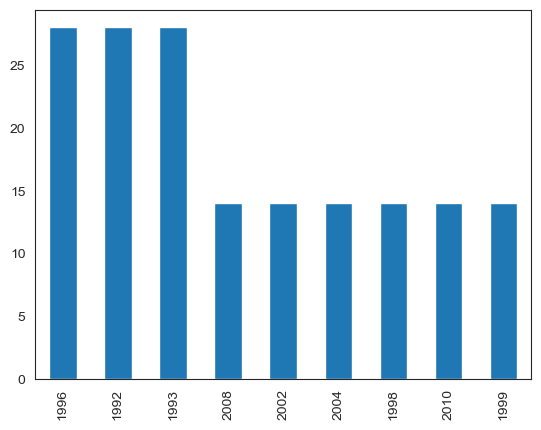

In [88]:
sa["starting_year"].value_counts().plot.bar()
plt.show()

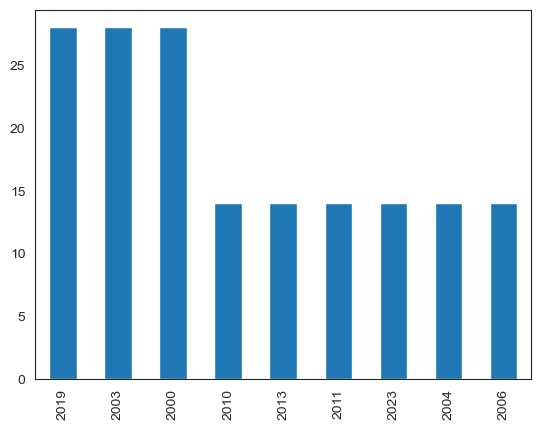

In [89]:
sa["ending_year"].value_counts().plot.bar()
plt.show()

# NEW ZEALAND

In [90]:
# analysing the new zealand team
nz=a.get_group("NZ")
nz

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
18,LRPL Taylor,NZ,2006-2022,174,168,30,6774,181,49.08,8052,84.12,19,37,4,2006,2022
23,MJ Guptill,NZ,2009-2022,159,159,13,6238,237,42.72,7096,87.90,17,30,13,2009,2022
40,KS Williamson,NZ,2010-2023,132,128,9,5366,145,45.09,6637,80.84,9,37,4,2010,2023
41,NJ Astle,NZ,1995-2007,145,145,11,5307,122,39.60,7198,73.72,9,37,6,1995,2007
43,SP Fleming,NZ,1994-2007,174,171,19,5269,134,34.66,7219,72.98,6,33,13,1994,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2757,AH Jones,NZ,1987-1995,68,68,8,2228,90,37.13,3878,57.45,0,22,2,1987,1995
2762,AC Parore,NZ,1992-2002,119,107,18,2156,108,24.22,3180,67.79,1,5,12,1992,2002
2775,RG Twose,NZ,1995-2001,62,59,6,1993,103,37.60,2634,75.66,1,15,4,1995,2001
2792,GD Elliott,NZ,2008-2016,68,61,10,1849,115,36.25,2199,84.08,2,10,4,2008,2016


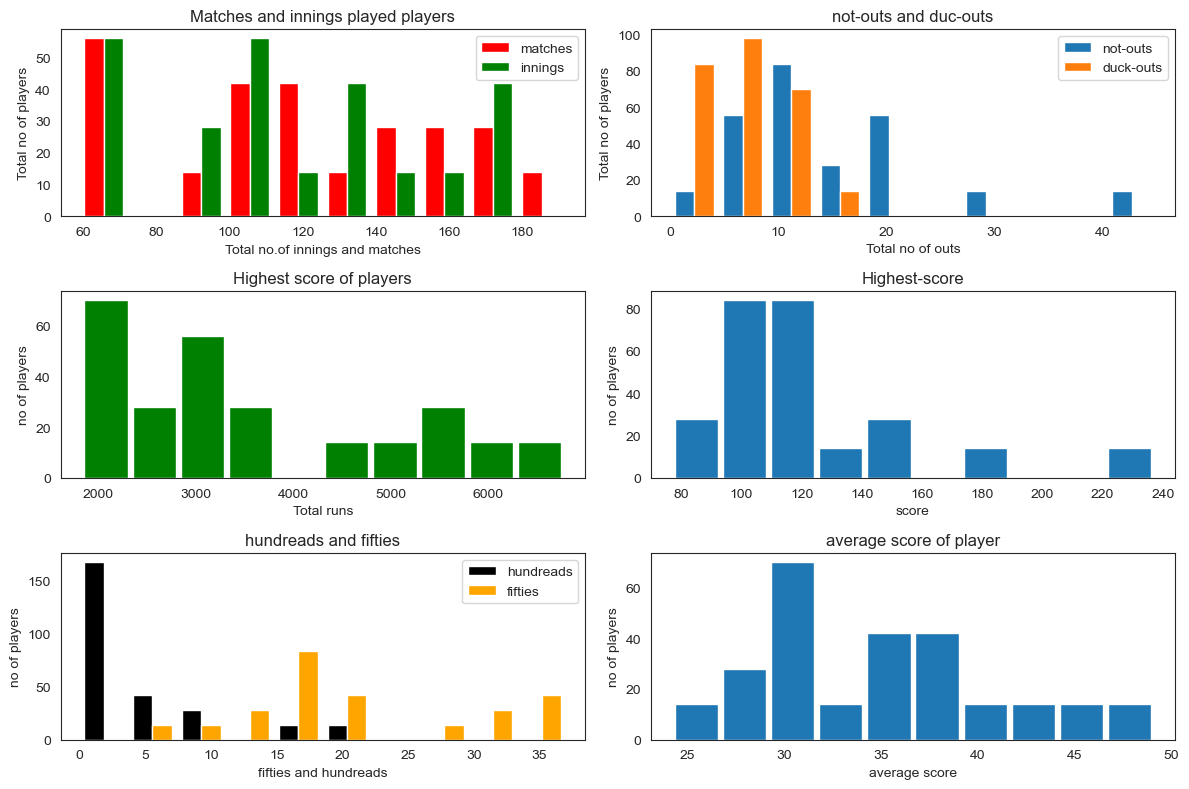

In [91]:
# plotting the bar plot
fig, ax = plt.subplots(3, 2, figsize=(12,8))

ax[0, 0].set_xlabel("Total no.of innings and matches")
ax[0, 0].set_ylabel("Total no of players")
ax[0, 0].set_title("Matches and innings played players")
ax[0, 0].hist(nz[["matches_played","innings"]],rwidth=0.8,color=["red","green"],label=["matches","innings"])
ax[0, 0].legend()

ax[0, 1].set_xlabel("Total no of outs")
ax[0, 1].set_ylabel("Total no of players")
ax[0, 1].set_title("not-outs and duc-outs")
ax[0, 1].hist(nz[["not_outs","ducks"]],rwidth=0.8,label=["not-outs","duck-outs"])
ax[0, 1].legend()

ax[1, 0].set_xlabel("Total runs")
ax[1, 0].set_ylabel("no of players")
ax[1, 0].set_title("Highest score of players")
ax[1, 0].hist(nz["total_runs"],rwidth=0.9,color="green")

ax[1, 1].set_xlabel("score")
ax[1, 1].set_ylabel("no of players")
ax[1, 1].set_title("Highest-score")
ax[1, 1].hist(nz["highest_score"],rwidth=0.9)

ax[2, 0].set_xlabel("fifties and hundreads")
ax[2, 0].set_ylabel("no of players")
ax[2, 0].set_title("hundreads and fifties")
ax[2, 0].hist(nz[["hundreads","fifties"]],rwidth=0.8,color=["black","orange"],label=["hundreads","fifties"])
ax[2, 0].legend()

ax[2, 1].set_xlabel("average score")
ax[2, 1].set_ylabel("no of players")
ax[2, 1].set_title("average score of player")
ax[2, 1].hist(nz["average"],rwidth=0.9)

plt.tight_layout()
plt.show()

In [92]:
# sorting the column values to get top players based on the column vallues.
newzland=nz.sort_values(["total_runs","highest_score","average","hundreads","fifties","matches_played","innings"],ascending=False)

In [93]:
# top 10 best players from newzland
newzland.drop_duplicates().head(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
18,LRPL Taylor,NZ,2006-2022,174,168,30,6774,181,49.08,8052,84.12,19,37,4,2006,2022
23,MJ Guptill,NZ,2009-2022,159,159,13,6238,237,42.72,7096,87.90,17,30,13,2009,2022
40,KS Williamson,NZ,2010-2023,132,128,9,5366,145,45.09,6637,80.84,9,37,4,2010,2023
41,NJ Astle,NZ,1995-2007,145,145,11,5307,122,39.60,7198,73.72,9,37,6,1995,2007
43,SP Fleming,NZ,1994-2007,174,171,19,5269,134,34.66,7219,72.98,6,33,13,1994,2007
55,BB McCullum,NZ,2002-2016,192,178,20,4653,119,29.44,4697,99.06,2,27,17,2002,2016
95,MD Crowe,NZ,1982-1995,108,107,18,3453,107,38.79,4788,72.11,4,22,2,1982,1995
100,CL Cairns,NZ,1991-2006,149,134,15,3330,115,27.98,3935,84.62,2,16,6,1991,2006
109,TWM Latham,NZ,2012-2023,101,96,10,3081,145,35.82,3586,85.91,7,15,9,2012,2023
111,CD McMillan,NZ,1997-2007,119,113,13,2953,117,29.53,3771,78.30,3,16,5,1997,2007


In [94]:
# top 10 average players from newzland
newzland.drop_duplicates().tail(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
111,CD McMillan,NZ,1997-2007,119,113,13,2953,117,29.53,3771,78.30,3,16,5,1997,2007
117,SB Styris,NZ,1999-2011,121,105,14,2902,101,31.89,3616,80.25,2,19,5,1999,2011
118,CZ Harris,NZ,1990-2004,157,137,45,2884,77,31.34,4158,69.36,0,14,9,1990,2004
128,JG Wright,NZ,1978-1992,100,100,0,2681,101,26.81,4769,56.21,1,17,5,1978,1992
134,KR Rutherford,NZ,1985-1995,92,89,7,2570,108,31.34,3997,64.29,1,16,5,1985,1995
157,AH Jones,NZ,1987-1995,68,68,8,2228,90,37.13,3878,57.45,0,22,2,1987,1995
162,AC Parore,NZ,1992-2002,119,107,18,2156,108,24.22,3180,67.79,1,5,12,1992,2002
175,RG Twose,NZ,1995-2001,62,59,6,1993,103,37.60,2634,75.66,1,15,4,1995,2001
192,GD Elliott,NZ,2008-2016,68,61,10,1849,115,36.25,2199,84.08,2,10,4,2008,2016
194,MJ Greatbatch,NZ,1988-1996,68,67,5,1830,111,29.51,2485,73.64,2,12,6,1988,1996


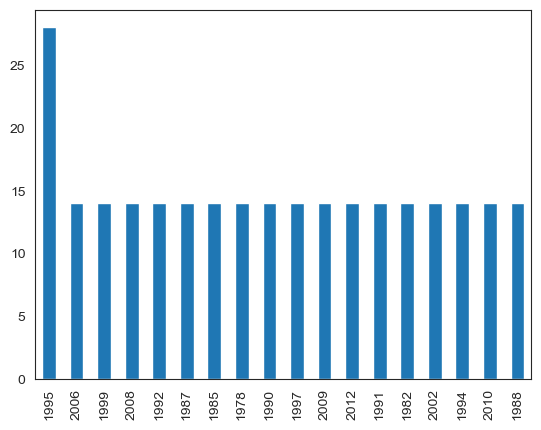

In [95]:
nz["starting_year"].value_counts().plot.bar()
plt.show()

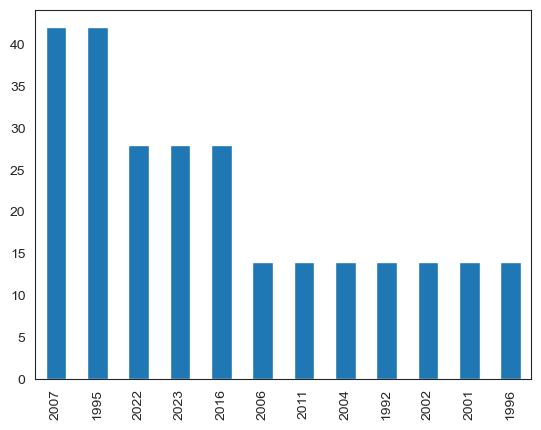

In [96]:
nz["ending_year"].value_counts().plot.bar()
plt.show()

# SRI LANKA

In [97]:
# analysing the sri lanka team
sl=a.get_group("SL")
sl

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
6,DPMD Jayawardene,SL,1998-2015,299,282,28,8136,144,32.03,10382,78.36,11,49,21,1998,2015
7,TM Dilshan,SL,1999-2016,243,231,28,8091,160,39.85,9325,86.76,19,37,9,1999,2016
8,ST Jayasuriya,SL,1989-2011,265,262,11,7664,157,30.53,8450,90.69,18,36,24,1989,2011
36,MS Atapattu,SL,1990-2007,162,158,23,5511,132,40.82,8039,68.55,8,38,4,1990,2007
45,WU Tharanga,SL,2005-2019,168,164,15,5130,133,34.42,6681,76.78,11,27,10,2005,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2751,RS Kaluwitharana,SL,1990-2004,97,94,7,2342,102,26.91,2957,79.20,2,16,10,1990,2004
2761,MDKJ Perera,SL,2013-2021,71,70,2,2173,135,31.95,2340,92.86,6,9,9,2013,2021
2764,AP Gurusinha,SL,1985-1996,77,76,3,2127,108,29.13,3418,62.22,1,12,7,1985,1996
2765,BKG Mendis,SL,2016-2023,74,73,5,2127,119,31.27,2532,84.00,1,17,9,2016,2023


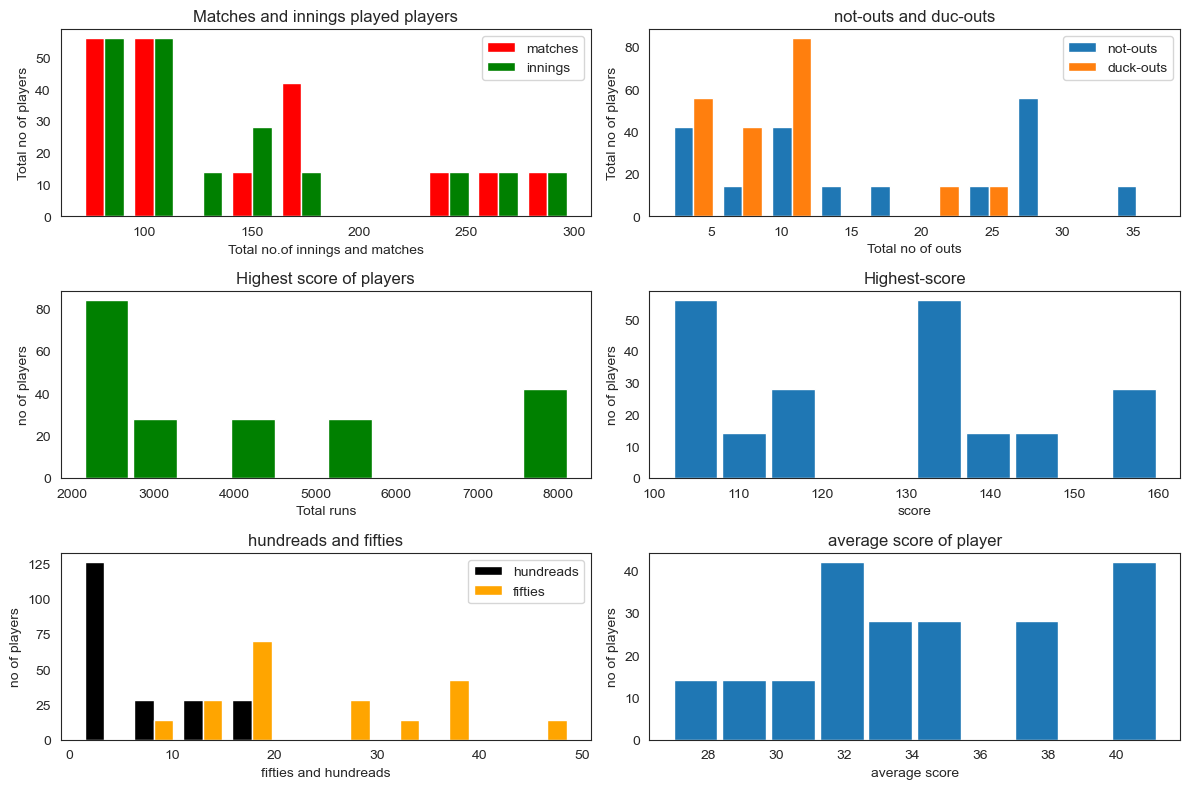

In [98]:
# plotting the bar plot
fig, ax = plt.subplots(3, 2, figsize=(12,8))

ax[0, 0].set_xlabel("Total no.of innings and matches")
ax[0, 0].set_ylabel("Total no of players")
ax[0, 0].set_title("Matches and innings played players")
ax[0, 0].hist(sl[["matches_played","innings"]],rwidth=0.8,color=["red","green"],label=["matches","innings"])
ax[0, 0].legend()

ax[0, 1].set_xlabel("Total no of outs")
ax[0, 1].set_ylabel("Total no of players")
ax[0, 1].set_title("not-outs and duc-outs")
ax[0, 1].hist(sl[["not_outs","ducks"]],rwidth=0.8,label=["not-outs","duck-outs"])
ax[0, 1].legend()

ax[1, 0].set_xlabel("Total runs")
ax[1, 0].set_ylabel("no of players")
ax[1, 0].set_title("Highest score of players")
ax[1, 0].hist(sl["total_runs"],rwidth=0.9,color="green")

ax[1, 1].set_xlabel("score")
ax[1, 1].set_ylabel("no of players")
ax[1, 1].set_title("Highest-score")
ax[1, 1].hist(sl["highest_score"],rwidth=0.9)

ax[2, 0].set_xlabel("fifties and hundreads")
ax[2, 0].set_ylabel("no of players")
ax[2, 0].set_title("hundreads and fifties")
ax[2, 0].hist(sl[["hundreads","fifties"]],rwidth=0.8,color=["black","orange"],label=["hundreads","fifties"])
ax[2, 0].legend()

ax[2, 1].set_xlabel("average score")
ax[2, 1].set_ylabel("no of players")
ax[2, 1].set_title("average score of player")
ax[2, 1].hist(sl["average"],rwidth=0.9)

plt.tight_layout()
plt.show()

In [99]:
# sorting the column values to get top players based on the column vallues.
sreelanka=sl.sort_values(["total_runs","highest_score","average","hundreads","fifties","matches_played","innings"],ascending=False)

In [100]:
#top 10 players from the sreelanka
sreelanka.drop_duplicates().head(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
6,DPMD Jayawardene,SL,1998-2015,299,282,28,8136,144,32.03,10382,78.36,11,49,21,1998,2015
7,TM Dilshan,SL,1999-2016,243,231,28,8091,160,39.85,9325,86.76,19,37,9,1999,2016
8,ST Jayasuriya,SL,1989-2011,265,262,11,7664,157,30.53,8450,90.69,18,36,24,1989,2011
36,MS Atapattu,SL,1990-2007,162,158,23,5511,132,40.82,8039,68.55,8,38,4,1990,2007
45,WU Tharanga,SL,2005-2019,168,164,15,5130,133,34.42,6681,76.78,11,27,10,2005,2019
62,AD Mathews,SL,2008-2023,164,144,37,4412,139,41.23,5205,84.76,2,30,12,2008,2023
74,A Ranatunga,SL,1982-1999,140,135,27,4101,131,37.97,5193,78.97,3,26,6,1982,1999
114,LD Chandimal,SL,2010-2022,110,105,17,2931,105,33.30,3941,74.37,3,20,5,2010,2022
125,RS Mahanama,SL,1986-1999,103,96,12,2771,119,32.98,4377,63.30,3,19,5,1986,1999
140,RP Arnold,SL,1998-2007,111,93,27,2513,103,38.07,3400,73.91,1,18,6,1998,2007


In [101]:
# top 10 average players from sreelanka
sreelanka.drop_duplicates().tail(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
62,AD Mathews,SL,2008-2023,164,144,37,4412,139,41.23,5205,84.76,2,30,12,2008,2023
74,A Ranatunga,SL,1982-1999,140,135,27,4101,131,37.97,5193,78.97,3,26,6,1982,1999
114,LD Chandimal,SL,2010-2022,110,105,17,2931,105,33.30,3941,74.37,3,20,5,2010,2022
125,RS Mahanama,SL,1986-1999,103,96,12,2771,119,32.98,4377,63.30,3,19,5,1986,1999
140,RP Arnold,SL,1998-2007,111,93,27,2513,103,38.07,3400,73.91,1,18,6,1998,2007
151,RS Kaluwitharana,SL,1990-2004,97,94,7,2342,102,26.91,2957,79.20,2,16,10,1990,2004
161,MDKJ Perera,SL,2013-2021,71,70,2,2173,135,31.95,2340,92.86,6,9,9,2013,2021
165,BKG Mendis,SL,2016-2023,74,73,5,2127,119,31.27,2532,84.00,1,17,9,2016,2023
164,AP Gurusinha,SL,1985-1996,77,76,3,2127,108,29.13,3418,62.22,1,12,7,1985,1996
169,HDRL Thirimanne,SL,2010-2019,88,74,12,2120,102,34.19,2989,70.92,1,15,5,2010,2019


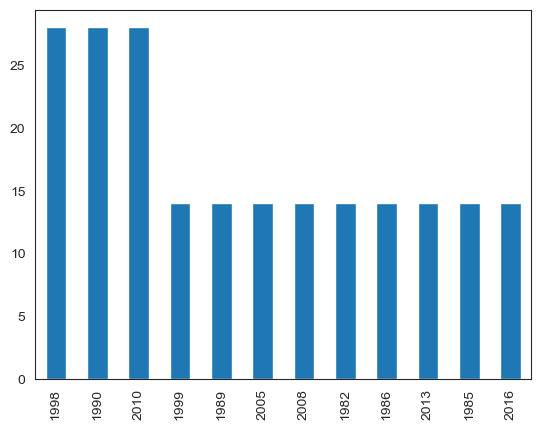

In [102]:
sl["starting_year"].value_counts().plot.bar()
plt.show()

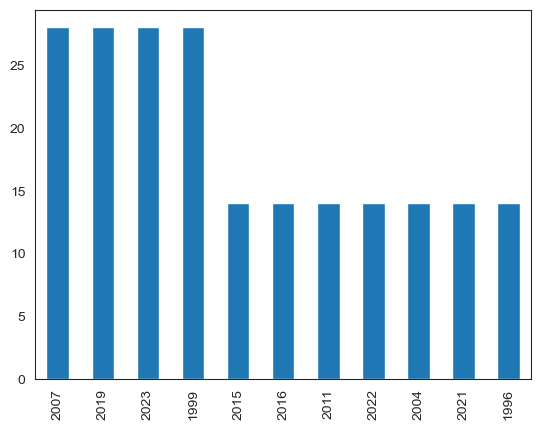

In [103]:
sl["ending_year"].value_counts().plot.bar()
plt.show()

# BANGLADESH

In [104]:
# analysing the bangladesh team
ban=a.get_group("BAN")
ban

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
14,Tamim Iqbal,BAN,2007-2023,195,195,10,7016,158,37.92,8844,79.33,14,46,17,2007,2023
38,Mushfiqur Rahim,BAN,2006-2023,198,188,32,5495,125,35.22,7073,77.68,6,33,9,2006,2023
129,Mohammad Ashraful,BAN,2001-2013,142,137,9,2673,103,20.88,3920,68.18,1,16,11,2001,2013
159,Imrul Kayes,BAN,2008-2018,69,69,1,2183,144,32.10,3085,70.76,4,13,2,2008,2018
199,Shahriar Nafees,BAN,2005-2011,62,62,3,1778,118,30.13,2554,69.61,2,12,9,2005,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,Tamim Iqbal,BAN,2007-2023,195,195,10,7016,158,37.92,8844,79.33,14,46,17,2007,2023
2638,Mushfiqur Rahim,BAN,2006-2023,198,188,32,5495,125,35.22,7073,77.68,6,33,9,2006,2023
2729,Mohammad Ashraful,BAN,2001-2013,142,137,9,2673,103,20.88,3920,68.18,1,16,11,2001,2013
2759,Imrul Kayes,BAN,2008-2018,69,69,1,2183,144,32.10,3085,70.76,4,13,2,2008,2018


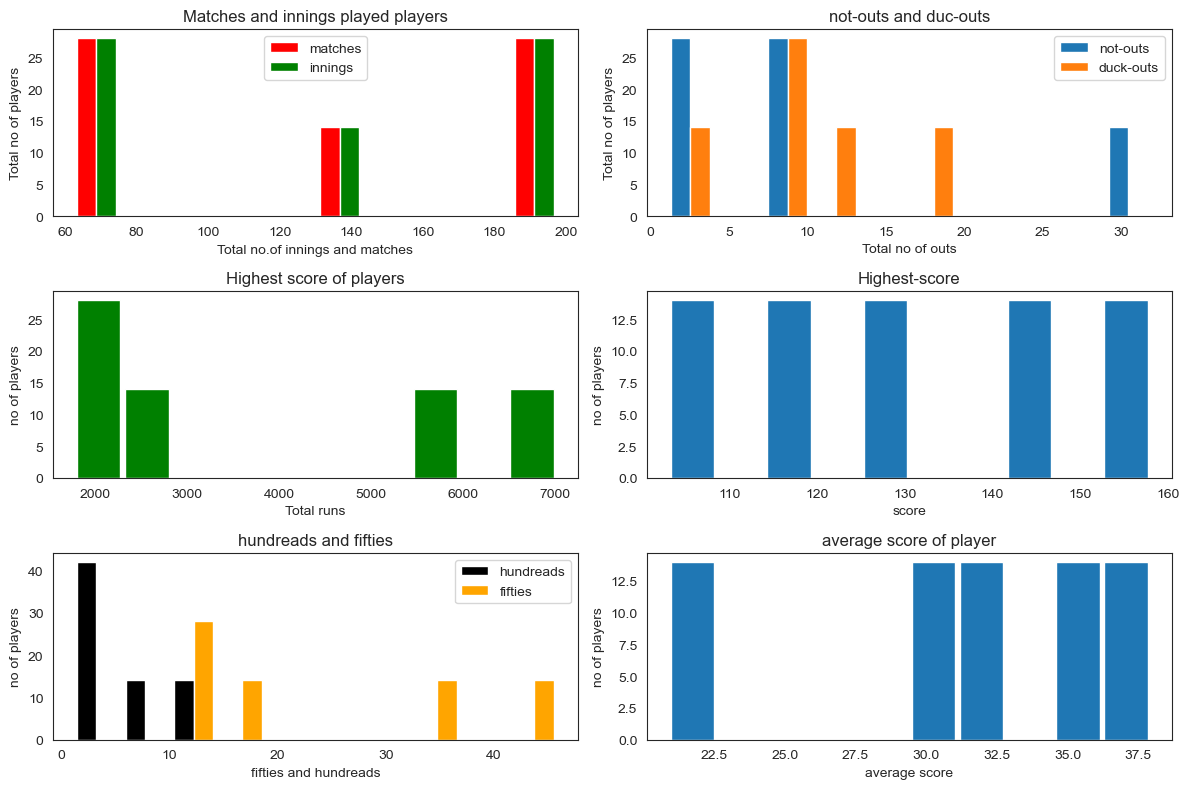

In [105]:
# plotting the bar plot
fig, ax = plt.subplots(3, 2, figsize=(12,8))

ax[0, 0].set_xlabel("Total no.of innings and matches")
ax[0, 0].set_ylabel("Total no of players")
ax[0, 0].set_title("Matches and innings played players")
ax[0, 0].hist(ban[["matches_played","innings"]],rwidth=0.8,color=["red","green"],label=["matches","innings"])
ax[0, 0].legend()

ax[0, 1].set_xlabel("Total no of outs")
ax[0, 1].set_ylabel("Total no of players")
ax[0, 1].set_title("not-outs and duc-outs")
ax[0, 1].hist(ban[["not_outs","ducks"]],rwidth=0.8,label=["not-outs","duck-outs"])
ax[0, 1].legend()

ax[1, 0].set_xlabel("Total runs")
ax[1, 0].set_ylabel("no of players")
ax[1, 0].set_title("Highest score of players")
ax[1, 0].hist(ban["total_runs"],rwidth=0.9,color="green")

ax[1, 1].set_xlabel("score")
ax[1, 1].set_ylabel("no of players")
ax[1, 1].set_title("Highest-score")
ax[1, 1].hist(ban["highest_score"],rwidth=0.9)

ax[2, 0].set_xlabel("fifties and hundreads")
ax[2, 0].set_ylabel("no of players")
ax[2, 0].set_title("hundreads and fifties")
ax[2, 0].hist(ban[["hundreads","fifties"]],rwidth=0.8,color=["black","orange"],label=["hundreads","fifties"])
ax[2, 0].legend()

ax[2, 1].set_xlabel("average score")
ax[2, 1].set_ylabel("no of players")
ax[2, 1].set_title("average score of player")
ax[2, 1].hist(ban["average"],rwidth=0.9)

plt.tight_layout()
plt.show()

In [106]:
# sorting the column values to get top players based on the column vallues.
bangladesh=ban.sort_values(["total_runs","highest_score","average","hundreads","fifties","matches_played","innings"],ascending=False)

In [107]:
# top 10 best players from bangladesh.
bangladesh.drop_duplicates().head(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
14,Tamim Iqbal,BAN,2007-2023,195,195,10,7016,158,37.92,8844,79.33,14,46,17,2007,2023
38,Mushfiqur Rahim,BAN,2006-2023,198,188,32,5495,125,35.22,7073,77.68,6,33,9,2006,2023
129,Mohammad Ashraful,BAN,2001-2013,142,137,9,2673,103,20.88,3920,68.18,1,16,11,2001,2013
159,Imrul Kayes,BAN,2008-2018,69,69,1,2183,144,32.10,3085,70.76,4,13,2,2008,2018
199,Shahriar Nafees,BAN,2005-2011,62,62,3,1778,118,30.13,2554,69.61,2,12,9,2005,2011


In [108]:
# top 10 average players from bangladesh.
bangladesh.drop_duplicates().tail(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
14,Tamim Iqbal,BAN,2007-2023,195,195,10,7016,158,37.92,8844,79.33,14,46,17,2007,2023
38,Mushfiqur Rahim,BAN,2006-2023,198,188,32,5495,125,35.22,7073,77.68,6,33,9,2006,2023
129,Mohammad Ashraful,BAN,2001-2013,142,137,9,2673,103,20.88,3920,68.18,1,16,11,2001,2013
159,Imrul Kayes,BAN,2008-2018,69,69,1,2183,144,32.10,3085,70.76,4,13,2,2008,2018
199,Shahriar Nafees,BAN,2005-2011,62,62,3,1778,118,30.13,2554,69.61,2,12,9,2005,2011


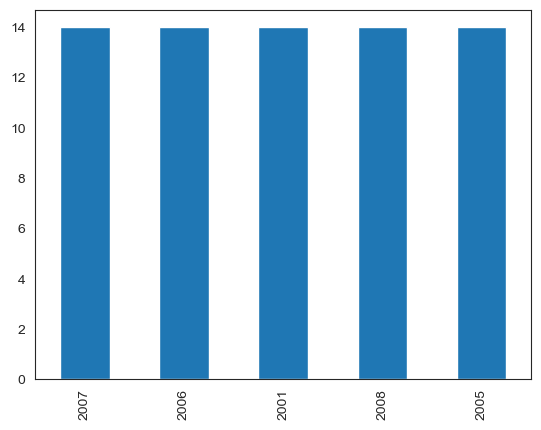

In [109]:
ban["starting_year"].value_counts().plot.bar()
plt.show()

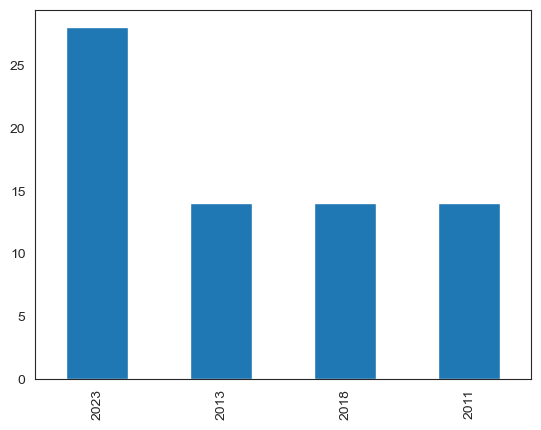

In [110]:
ban["ending_year"].value_counts().plot.bar()
plt.show()

# ZIMBABWE

In [111]:
# analysing the zimbabwe team
zim=a.get_group("ZIM")
zim

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
37,BRM Taylor,ZIM,2004-2021,175,174,14,5506,145,34.41,7420,74.20,8,34,14,2004,2021
46,H Masakadza,ZIM,2001-2019,186,186,4,4985,178,27.39,6820,73.09,4,30,15,2001,2019
60,GW Flower,ZIM,1992-2010,138,136,11,4429,142,35.43,6371,69.51,5,30,17,1992,2010
67,A Flower,ZIM,1992-2003,133,131,5,4234,142,33.60,5599,75.62,1,39,8,1992,2003
80,SC Williams,ZIM,2005-2023,135,133,18,3956,129,34.40,4907,80.61,5,29,8,2005,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2748,CR Ervine,ZIM,2010-2023,87,84,9,2371,130,31.61,3151,75.24,3,12,8,2010,2023
2772,CJ Chibhabha,ZIM,2005-2023,89,89,1,2074,99,23.56,3258,63.65,0,13,6,2005,2023
2780,SV Carlisle,ZIM,1995-2005,69,69,6,1960,121,31.11,3076,63.71,2,7,7,1995,2005
2782,S Matsikenyeri,ZIM,2002-2012,96,94,7,1942,90,22.32,2677,72.54,0,12,8,2002,2012


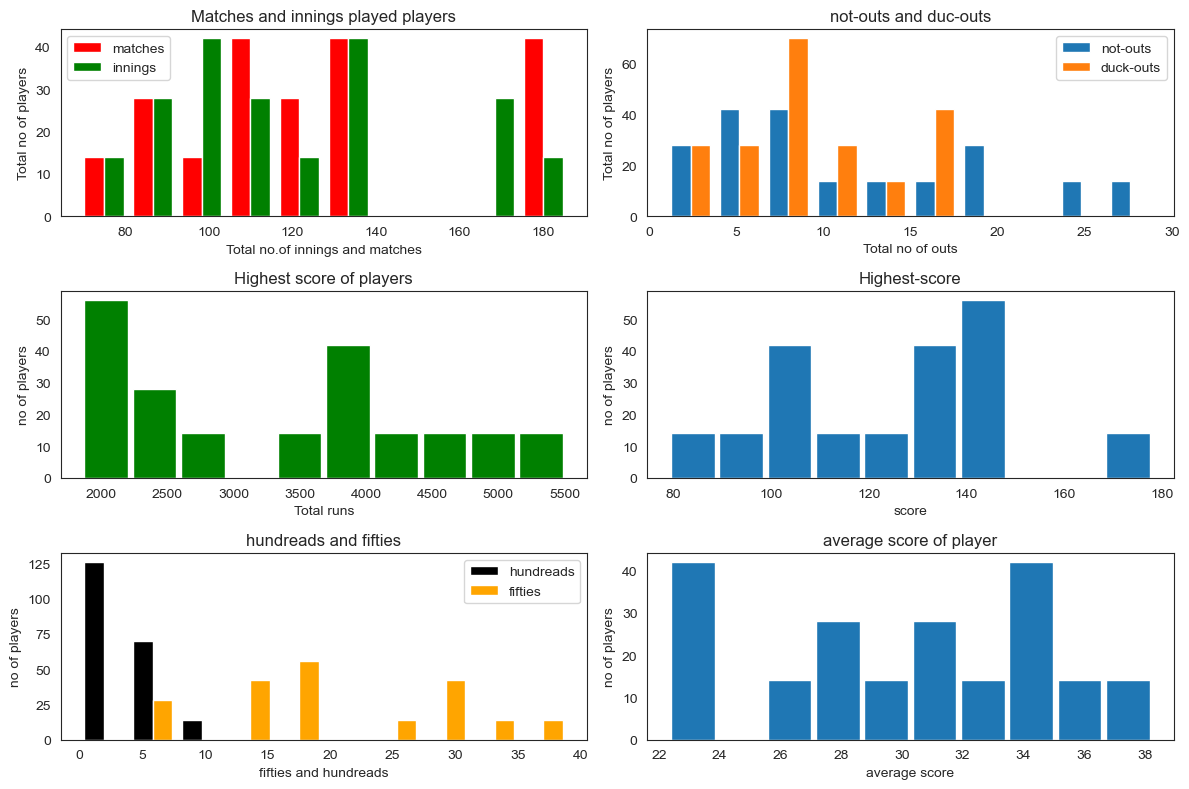

In [112]:
# plotting the bar plot
fig, ax = plt.subplots(3, 2, figsize=(12,8))

ax[0, 0].set_xlabel("Total no.of innings and matches")
ax[0, 0].set_ylabel("Total no of players")
ax[0, 0].set_title("Matches and innings played players")
ax[0, 0].hist(zim[["matches_played","innings"]],rwidth=0.8,color=["red","green"],label=["matches","innings"])
ax[0, 0].legend()

ax[0, 1].set_xlabel("Total no of outs")
ax[0, 1].set_ylabel("Total no of players")
ax[0, 1].set_title("not-outs and duc-outs")
ax[0, 1].hist(zim[["not_outs","ducks"]],rwidth=0.8,label=["not-outs","duck-outs"])
ax[0, 1].legend()

ax[1, 0].set_xlabel("Total runs")
ax[1, 0].set_ylabel("no of players")
ax[1, 0].set_title("Highest score of players")
ax[1, 0].hist(zim["total_runs"],rwidth=0.9,color="green")

ax[1, 1].set_xlabel("score")
ax[1, 1].set_ylabel("no of players")
ax[1, 1].set_title("Highest-score")
ax[1, 1].hist(zim["highest_score"],rwidth=0.9)

ax[2, 0].set_xlabel("fifties and hundreads")
ax[2, 0].set_ylabel("no of players")
ax[2, 0].set_title("hundreads and fifties")
ax[2, 0].hist(zim[["hundreads","fifties"]],rwidth=0.8,color=["black","orange"],label=["hundreads","fifties"])
ax[2, 0].legend()

ax[2, 1].set_xlabel("average score")
ax[2, 1].set_ylabel("no of players")
ax[2, 1].set_title("average score of player")
ax[2, 1].hist(zim["average"],rwidth=0.9)

plt.tight_layout()
plt.show()

In [113]:
# sorting the column values to get top players based on the column vallues.
zimbabwe=zim.sort_values(["total_runs","highest_score","average","hundreads","fifties","matches_played","innings"],ascending=False)

In [114]:
# top 10 players of zimbombay.
zimbabwe.drop_duplicates().head(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
37,BRM Taylor,ZIM,2004-2021,175,174,14,5506,145,34.41,7420,74.20,8,34,14,2004,2021
46,H Masakadza,ZIM,2001-2019,186,186,4,4985,178,27.39,6820,73.09,4,30,15,2001,2019
60,GW Flower,ZIM,1992-2010,138,136,11,4429,142,35.43,6371,69.51,5,30,17,1992,2010
67,A Flower,ZIM,1992-2003,133,131,5,4234,142,33.60,5599,75.62,1,39,8,1992,2003
80,SC Williams,ZIM,2005-2023,135,133,18,3956,129,34.40,4907,80.61,5,29,8,2005,2023
84,E Chigumbura,ZIM,2004-2018,182,169,24,3851,117,26.55,4797,80.27,2,18,16,2004,2018
89,ADR Campbell,ZIM,1992-2002,125,124,9,3733,131,32.46,5599,66.67,4,24,4,1992,2002
101,Sikandar Raza,ZIM,2013-2023,107,104,17,3327,141,38.24,3984,83.50,6,18,3,2013,2023
120,T Taibu,ZIM,2001-2012,121,114,19,2867,107,30.17,4180,68.58,2,17,12,2001,2012
141,V Sibanda,ZIM,2003-2016,109,109,2,2488,103,23.25,4070,61.13,1,18,12,2003,2016


In [117]:
# top 10 average players of zimbombay
zimbabwe.drop_duplicates().tail(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
84,E Chigumbura,ZIM,2004-2018,182,169,24,3851,117,26.55,4797,80.27,2,18,16,2004,2018
89,ADR Campbell,ZIM,1992-2002,125,124,9,3733,131,32.46,5599,66.67,4,24,4,1992,2002
101,Sikandar Raza,ZIM,2013-2023,107,104,17,3327,141,38.24,3984,83.50,6,18,3,2013,2023
120,T Taibu,ZIM,2001-2012,121,114,19,2867,107,30.17,4180,68.58,2,17,12,2001,2012
141,V Sibanda,ZIM,2003-2016,109,109,2,2488,103,23.25,4070,61.13,1,18,12,2003,2016
148,CR Ervine,ZIM,2010-2023,87,84,9,2371,130,31.61,3151,75.24,3,12,8,2010,2023
172,CJ Chibhabha,ZIM,2005-2023,89,89,1,2074,99,23.56,3258,63.65,0,13,6,2005,2023
180,SV Carlisle,ZIM,1995-2005,69,69,6,1960,121,31.11,3076,63.71,2,7,7,1995,2005
182,S Matsikenyeri,ZIM,2002-2012,96,94,7,1942,90,22.32,2677,72.54,0,12,8,2002,2012
190,HH Streak,ZIM,1993-2005,112,94,29,1855,79,28.53,2462,75.34,0,6,2,1993,2005


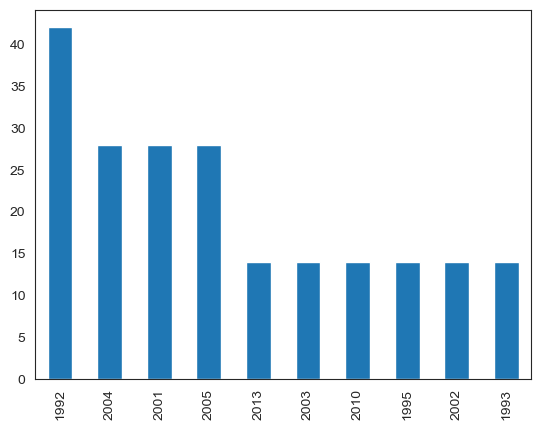

In [119]:
zim["starting_year"].value_counts().plot.bar()
plt.show()

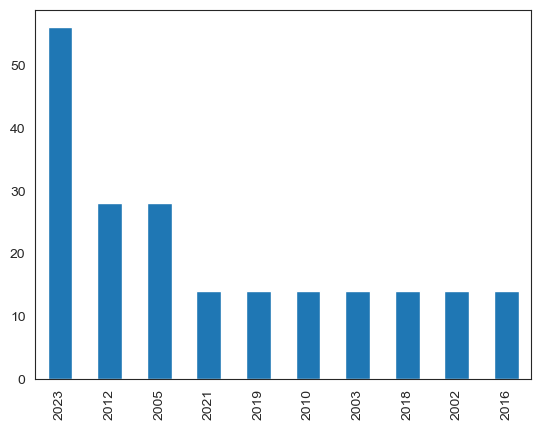

In [120]:
zim["ending_year"].value_counts().plot.bar()
plt.show()

# IRELAND

In [126]:
# analysing the ireland team
ire=a.get_group("IRE")
ire

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
104,PR Stirling,IRE,2008-2023,93,93,2,3239,177,35.59,3779,85.71,8,15,9,2008,2023
138,WTS Porterfield,IRE,2006-2022,89,89,1,2548,139,28.95,3677,69.29,5,13,6,2006,2022
304,PR Stirling,IRE,2008-2023,93,93,2,3239,177,35.59,3779,85.71,8,15,9,2008,2023
338,WTS Porterfield,IRE,2006-2022,89,89,1,2548,139,28.95,3677,69.29,5,13,6,2006,2022
504,PR Stirling,IRE,2008-2023,93,93,2,3239,177,35.59,3779,85.71,8,15,9,2008,2023
538,WTS Porterfield,IRE,2006-2022,89,89,1,2548,139,28.95,3677,69.29,5,13,6,2006,2022
704,PR Stirling,IRE,2008-2023,93,93,2,3239,177,35.59,3779,85.71,8,15,9,2008,2023
738,WTS Porterfield,IRE,2006-2022,89,89,1,2548,139,28.95,3677,69.29,5,13,6,2006,2022
904,PR Stirling,IRE,2008-2023,93,93,2,3239,177,35.59,3779,85.71,8,15,9,2008,2023
938,WTS Porterfield,IRE,2006-2022,89,89,1,2548,139,28.95,3677,69.29,5,13,6,2006,2022


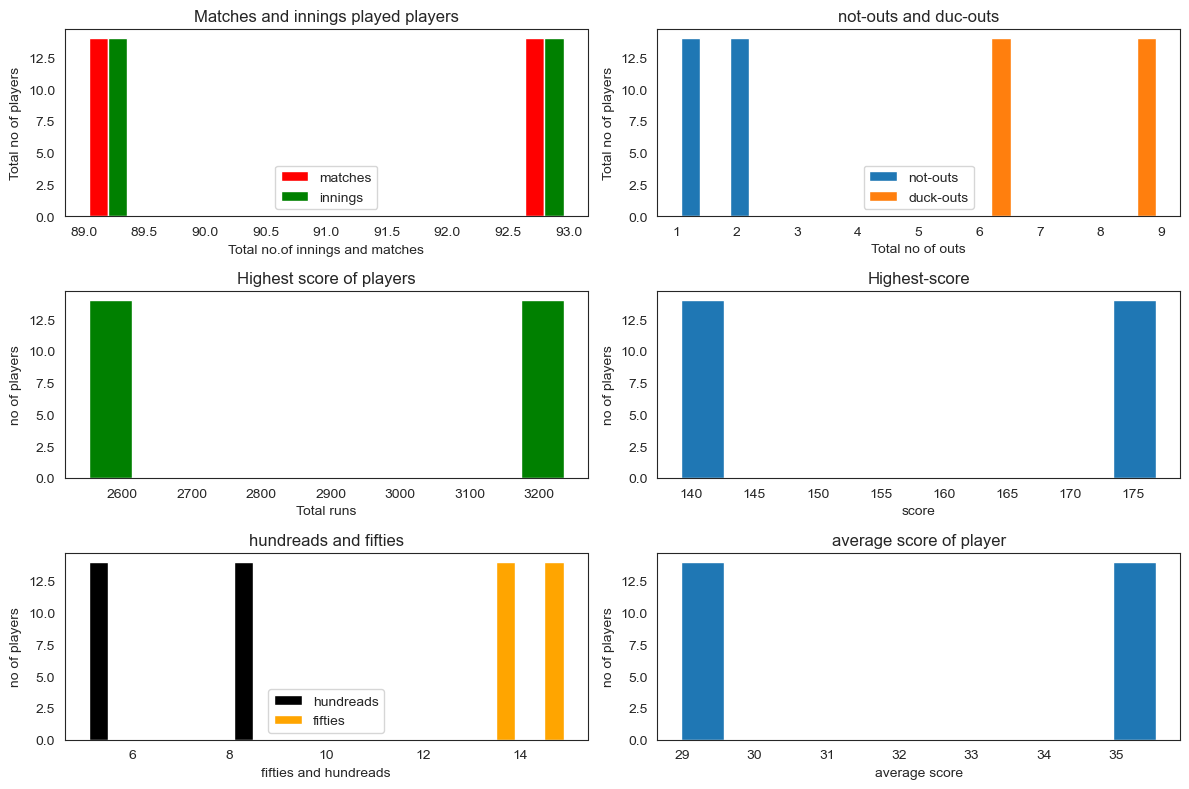

In [128]:
# plotting the bar plot
fig, ax = plt.subplots(3, 2, figsize=(12,8))

ax[0, 0].set_xlabel("Total no.of innings and matches")
ax[0, 0].set_ylabel("Total no of players")
ax[0, 0].set_title("Matches and innings played players")
ax[0, 0].hist(ire[["matches_played","innings"]],rwidth=0.8,color=["red","green"],label=["matches","innings"])
ax[0, 0].legend()

ax[0, 1].set_xlabel("Total no of outs")
ax[0, 1].set_ylabel("Total no of players")
ax[0, 1].set_title("not-outs and duc-outs")
ax[0, 1].hist(ire[["not_outs","ducks"]],rwidth=0.8,label=["not-outs","duck-outs"])
ax[0, 1].legend()

ax[1, 0].set_xlabel("Total runs")
ax[1, 0].set_ylabel("no of players")
ax[1, 0].set_title("Highest score of players")
ax[1, 0].hist(ire["total_runs"],rwidth=0.9,color="green")

ax[1, 1].set_xlabel("score")
ax[1, 1].set_ylabel("no of players")
ax[1, 1].set_title("Highest-score")
ax[1, 1].hist(ire["highest_score"],rwidth=0.9)

ax[2, 0].set_xlabel("fifties and hundreads")
ax[2, 0].set_ylabel("no of players")
ax[2, 0].set_title("hundreads and fifties")
ax[2, 0].hist(ire[["hundreads","fifties"]],rwidth=0.8,color=["black","orange"],label=["hundreads","fifties"])
ax[2, 0].legend()

ax[2, 1].set_xlabel("average score")
ax[2, 1].set_ylabel("no of players")
ax[2, 1].set_title("average score of player")
ax[2, 1].hist(ire["average"],rwidth=0.9)

plt.tight_layout()
plt.show()

In [130]:
# sorting the column values to get top players based on the column values
ireland=ire.sort_values(["total_runs","highest_score","average","hundreads","fifties","matches_played","innings"],ascending=False)

In [131]:
# top 10 players of ireland
ireland.drop_duplicates().head(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
104,PR Stirling,IRE,2008-2023,93,93,2,3239,177,35.59,3779,85.71,8,15,9,2008,2023
138,WTS Porterfield,IRE,2006-2022,89,89,1,2548,139,28.95,3677,69.29,5,13,6,2006,2022


In [132]:
# top 10 average players of ireland
ireland.drop_duplicates().tail(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
104,PR Stirling,IRE,2008-2023,93,93,2,3239,177,35.59,3779,85.71,8,15,9,2008,2023
138,WTS Porterfield,IRE,2006-2022,89,89,1,2548,139,28.95,3677,69.29,5,13,6,2006,2022


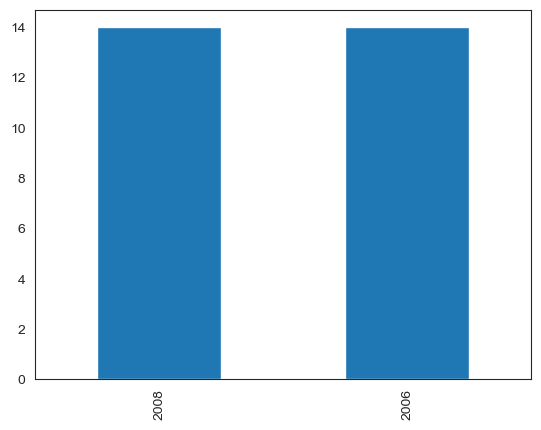

In [133]:
ire["starting_year"].value_counts().plot.bar()
plt.show()

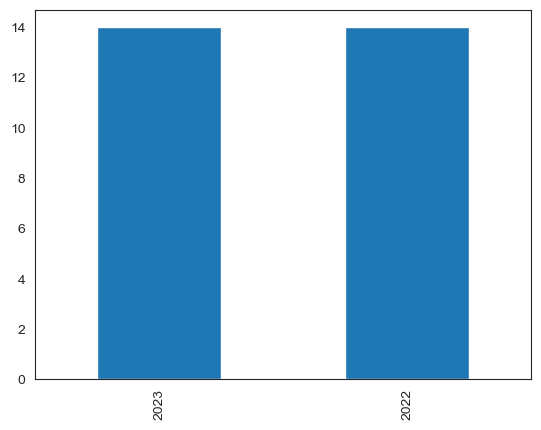

In [134]:
ire["ending_year"].value_counts().plot.bar()
plt.show()

# scotland

In [135]:
# analysing the scotland team
sco=a.get_group("SCOT")
sco

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
178,CS MacLeod,SCOT,2011-2022,50,50,4,1971,154,42.84,2419,81.47,8,8,3,2011,2022
183,KJ Coetzer,SCOT,2010-2023,50,50,2,1919,127,39.97,2281,84.12,2,15,4,2010,2023
378,CS MacLeod,SCOT,2011-2022,50,50,4,1971,154,42.84,2419,81.47,8,8,3,2011,2022
383,KJ Coetzer,SCOT,2010-2023,50,50,2,1919,127,39.97,2281,84.12,2,15,4,2010,2023
578,CS MacLeod,SCOT,2011-2022,50,50,4,1971,154,42.84,2419,81.47,8,8,3,2011,2022
583,KJ Coetzer,SCOT,2010-2023,50,50,2,1919,127,39.97,2281,84.12,2,15,4,2010,2023
778,CS MacLeod,SCOT,2011-2022,50,50,4,1971,154,42.84,2419,81.47,8,8,3,2011,2022
783,KJ Coetzer,SCOT,2010-2023,50,50,2,1919,127,39.97,2281,84.12,2,15,4,2010,2023
978,CS MacLeod,SCOT,2011-2022,50,50,4,1971,154,42.84,2419,81.47,8,8,3,2011,2022
983,KJ Coetzer,SCOT,2010-2023,50,50,2,1919,127,39.97,2281,84.12,2,15,4,2010,2023


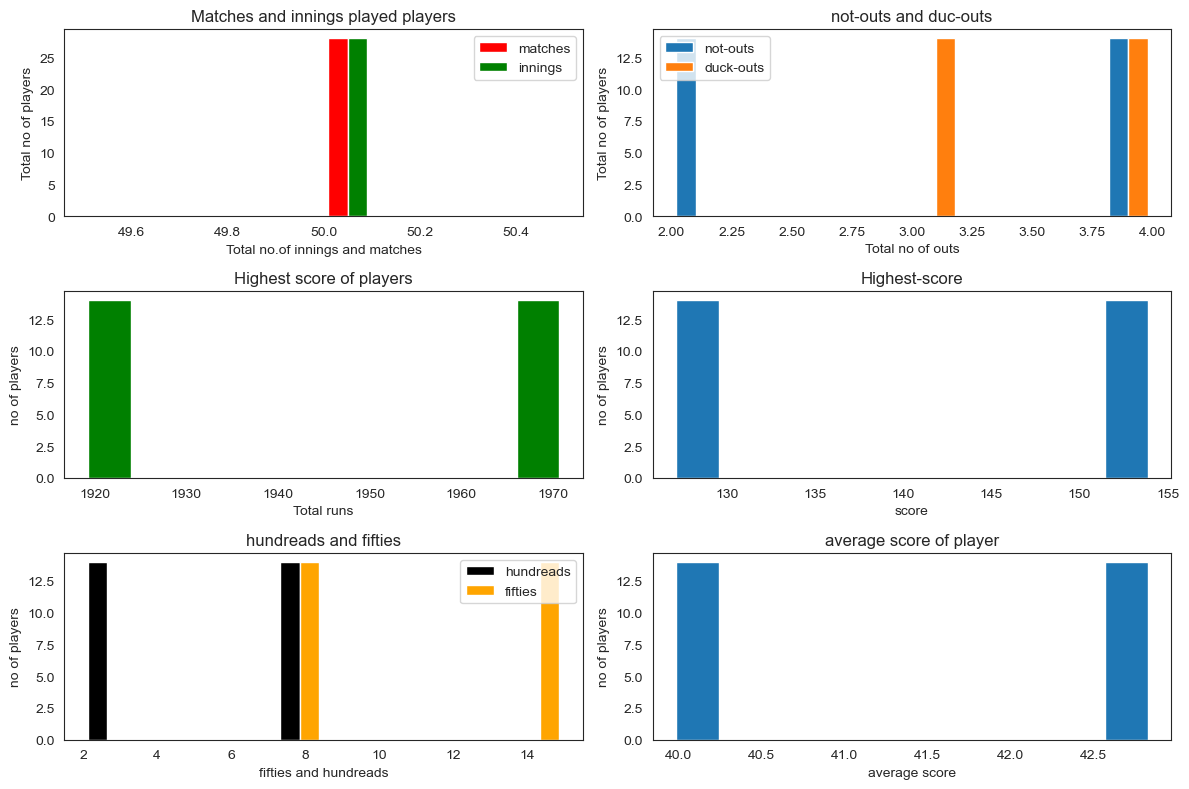

In [136]:
# plotting the bar plot
fig, ax = plt.subplots(3, 2, figsize=(12,8))

ax[0, 0].set_xlabel("Total no.of innings and matches")
ax[0, 0].set_ylabel("Total no of players")
ax[0, 0].set_title("Matches and innings played players")
ax[0, 0].hist(sco[["matches_played","innings"]],rwidth=0.8,color=["red","green"],label=["matches","innings"])
ax[0, 0].legend()

ax[0, 1].set_xlabel("Total no of outs")
ax[0, 1].set_ylabel("Total no of players")
ax[0, 1].set_title("not-outs and duc-outs")
ax[0, 1].hist(sco[["not_outs","ducks"]],rwidth=0.8,label=["not-outs","duck-outs"])
ax[0, 1].legend()

ax[1, 0].set_xlabel("Total runs")
ax[1, 0].set_ylabel("no of players")
ax[1, 0].set_title("Highest score of players")
ax[1, 0].hist(sco["total_runs"],rwidth=0.9,color="green")

ax[1, 1].set_xlabel("score")
ax[1, 1].set_ylabel("no of players")
ax[1, 1].set_title("Highest-score")
ax[1, 1].hist(sco["highest_score"],rwidth=0.9)

ax[2, 0].set_xlabel("fifties and hundreads")
ax[2, 0].set_ylabel("no of players")
ax[2, 0].set_title("hundreads and fifties")
ax[2, 0].hist(sco[["hundreads","fifties"]],rwidth=0.8,color=["black","orange"],label=["hundreads","fifties"])
ax[2, 0].legend()

ax[2, 1].set_xlabel("average score")
ax[2, 1].set_ylabel("no of players")
ax[2, 1].set_title("average score of player")
ax[2, 1].hist(sco["average"],rwidth=0.9)

plt.tight_layout()
plt.show()

In [137]:
# sorting the column values to get top players based on the column vallues.
scotland=sco.sort_values(["total_runs","highest_score","average","hundreads","fifties","matches_played","innings"],ascending=False)

In [138]:
# top 10 best players from scotland.
scotland.drop_duplicates().head(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
178,CS MacLeod,SCOT,2011-2022,50,50,4,1971,154,42.84,2419,81.47,8,8,3,2011,2022
183,KJ Coetzer,SCOT,2010-2023,50,50,2,1919,127,39.97,2281,84.12,2,15,4,2010,2023


In [139]:
# top 10 average players from scotland.
scotland.drop_duplicates().tail(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
178,CS MacLeod,SCOT,2011-2022,50,50,4,1971,154,42.84,2419,81.47,8,8,3,2011,2022
183,KJ Coetzer,SCOT,2010-2023,50,50,2,1919,127,39.97,2281,84.12,2,15,4,2010,2023


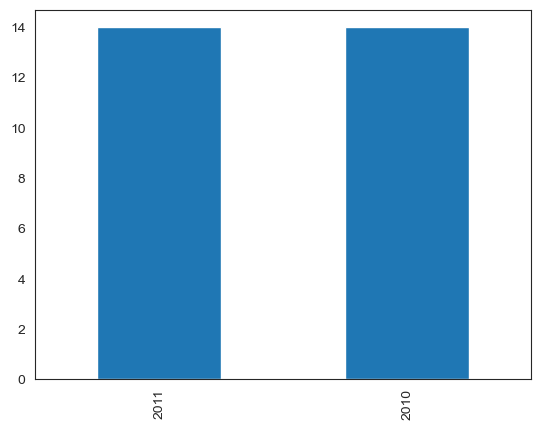

In [140]:
sco["starting_year"].value_counts().plot.bar()
plt.show()

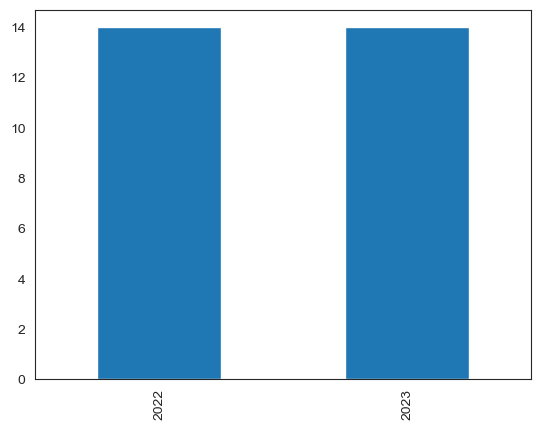

In [141]:
sco["ending_year"].value_counts().plot.bar()
plt.show()

# kenya

In [142]:
# analysing the kenya team
ken=a.get_group("KENYA")

In [143]:
ken

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
154,SO Tikolo,KENYA,1996-2011,87,86,9,2308,111,29.97,2943,78.42,3,14,10,1996,2011
354,SO Tikolo,KENYA,1996-2011,87,86,9,2308,111,29.97,2943,78.42,3,14,10,1996,2011
554,SO Tikolo,KENYA,1996-2011,87,86,9,2308,111,29.97,2943,78.42,3,14,10,1996,2011
754,SO Tikolo,KENYA,1996-2011,87,86,9,2308,111,29.97,2943,78.42,3,14,10,1996,2011
954,SO Tikolo,KENYA,1996-2011,87,86,9,2308,111,29.97,2943,78.42,3,14,10,1996,2011
1154,SO Tikolo,KENYA,1996-2011,87,86,9,2308,111,29.97,2943,78.42,3,14,10,1996,2011
1354,SO Tikolo,KENYA,1996-2011,87,86,9,2308,111,29.97,2943,78.42,3,14,10,1996,2011
1554,SO Tikolo,KENYA,1996-2011,87,86,9,2308,111,29.97,2943,78.42,3,14,10,1996,2011
1754,SO Tikolo,KENYA,1996-2011,87,86,9,2308,111,29.97,2943,78.42,3,14,10,1996,2011
1954,SO Tikolo,KENYA,1996-2011,87,86,9,2308,111,29.97,2943,78.42,3,14,10,1996,2011


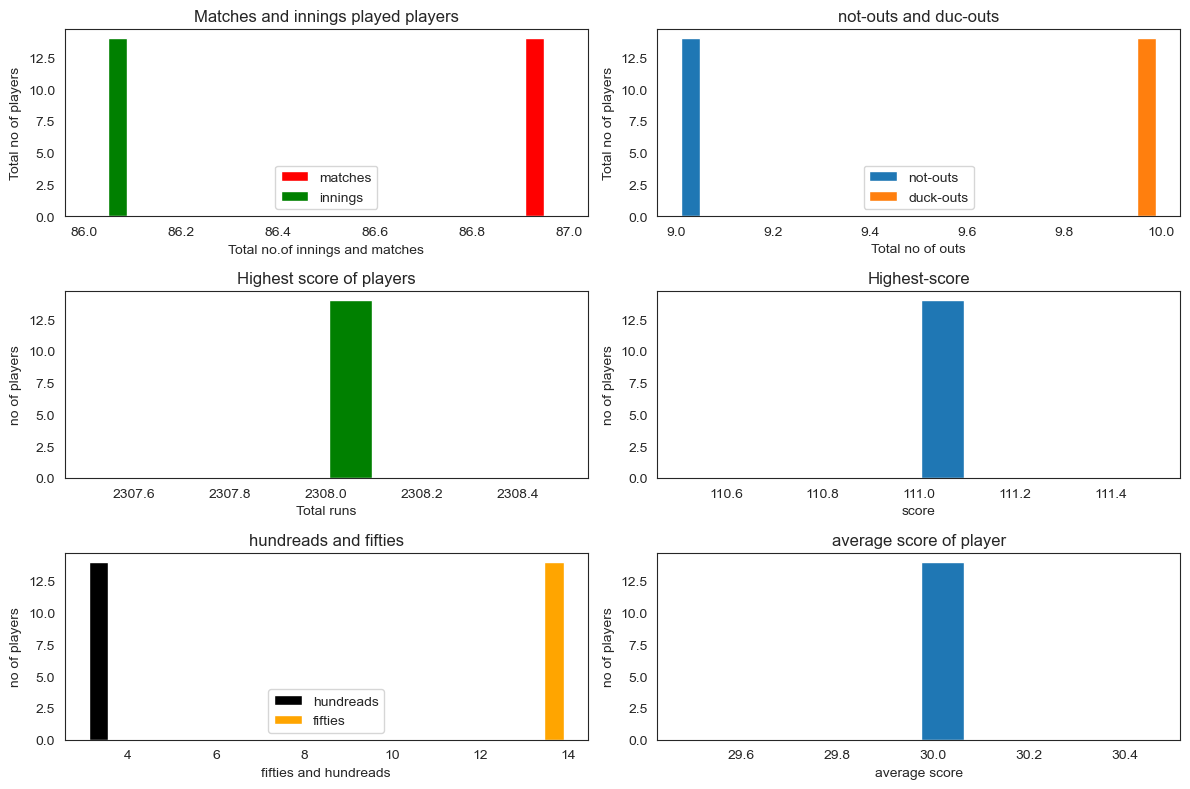

In [144]:
# plotting the bar plot
fig, ax = plt.subplots(3, 2, figsize=(12,8))

ax[0, 0].set_xlabel("Total no.of innings and matches")
ax[0, 0].set_ylabel("Total no of players")
ax[0, 0].set_title("Matches and innings played players")
ax[0, 0].hist(ken[["matches_played","innings"]],rwidth=0.8,color=["red","green"],label=["matches","innings"])
ax[0, 0].legend()

ax[0, 1].set_xlabel("Total no of outs")
ax[0, 1].set_ylabel("Total no of players")
ax[0, 1].set_title("not-outs and duc-outs")
ax[0, 1].hist(ken[["not_outs","ducks"]],rwidth=0.8,label=["not-outs","duck-outs"])
ax[0, 1].legend()

ax[1, 0].set_xlabel("Total runs")
ax[1, 0].set_ylabel("no of players")
ax[1, 0].set_title("Highest score of players")
ax[1, 0].hist(ken["total_runs"],rwidth=0.9,color="green")

ax[1, 1].set_xlabel("score")
ax[1, 1].set_ylabel("no of players")
ax[1, 1].set_title("Highest-score")
ax[1, 1].hist(ken["highest_score"],rwidth=0.9)

ax[2, 0].set_xlabel("fifties and hundreads")
ax[2, 0].set_ylabel("no of players")
ax[2, 0].set_title("hundreads and fifties")
ax[2, 0].hist(ken[["hundreads","fifties"]],rwidth=0.8,color=["black","orange"],label=["hundreads","fifties"])
ax[2, 0].legend()

ax[2, 1].set_xlabel("average score")
ax[2, 1].set_ylabel("no of players")
ax[2, 1].set_title("average score of player")
ax[2, 1].hist(ken["average"],rwidth=0.9)

plt.tight_layout()
plt.show()

In [148]:
# sorting the column values to get top players based on the column vallues.
Kenya=ken.sort_values(["total_runs","highest_score","average","hundreads","fifties","matches_played","innings"],ascending=False)

In [149]:
# top 10 best players from kenya.
Kenya.drop_duplicates().head(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
154,SO Tikolo,KENYA,1996-2011,87,86,9,2308,111,29.97,2943,78.42,3,14,10,1996,2011


In [150]:
# top 10 average players from kenya.
Kenya.drop_duplicates().tail(10)

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
154,SO Tikolo,KENYA,1996-2011,87,86,9,2308,111,29.97,2943,78.42,3,14,10,1996,2011


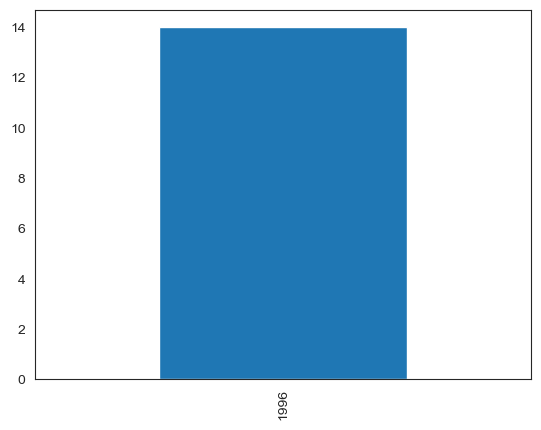

In [152]:
ken["starting_year"].value_counts().plot.bar()
plt.show()

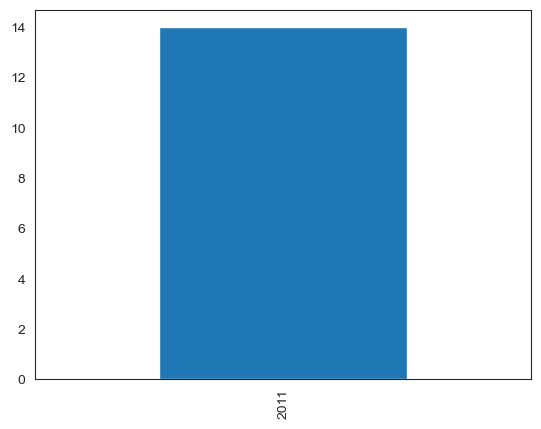

In [155]:
ken["ending_year"].value_counts().plot.bar()
plt.show()

In [121]:
data

,player_name,country,span,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
0,SR Tendulkar,IND,1989-2012,296,294,20,11663,200,42.56,13663,85.36,31,61,12,1989,2012
1,V Kohli,IND,2008-2023,218,215,27,10690,166,56.86,11305,94.55,42,50,14,2008,2023
2,RT Ponting,AUS,1995-2012,277,273,28,10401,164,42.45,12851,80.93,23,64,15,1995,2012
5,MS Dhoni,IND,2004-2019,260,233,65,8769,183,52.19,10007,87.62,8,62,6,2004,2019
6,DPMD Jayawardene,SL,1998-2015,299,282,28,8136,144,32.03,10382,78.36,11,49,21,1998,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,M Kaif,IND,2002-2006,87,81,13,1797,87,26.42,2556,70.30,0,13,7,2002,2006
2796,LMP Simmons,WI,2006-2015,60,60,3,1797,122,31.52,2525,71.16,1,15,7,2006,2015
2797,VVS Laxman,IND,1998-2006,60,59,4,1790,107,32.54,2462,72.70,5,8,2,1998,2006
2798,MW Gatting,ENG,1977-1993,78,74,15,1786,115,30.27,2578,69.27,1,8,4,1977,1993


In [122]:
data.corr()

,matches_played,innings,not_outs,total_runs,highest_score,average,balls_faced,strike_rate,hundreads,fifties,ducks,starting_year,ending_year
matches_played,1.000000,0.988936,0.637162,0.862054,0.284295,0.044889,0.838159,0.177420,0.480705,0.783839,0.603201,-0.060382,0.139700
innings,0.988936,1.000000,0.556210,0.904392,0.332079,0.072463,0.889377,0.145900,0.543519,0.829240,0.608302,-0.060873,0.139504
not_outs,0.637162,0.556210,1.000000,0.414441,-0.052981,0.197977,0.391403,0.145454,0.043488,0.404652,0.124651,-0.090211,0.017254
total_runs,0.862054,0.904392,0.414441,1.000000,0.541501,0.415633,0.962686,0.212256,0.791802,0.930078,0.446611,0.018014,0.183345
highest_score,0.284295,0.332079,-0.052981,0.541501,1.000000,0.501117,0.445648,0.384944,0.674655,0.425512,0.192564,0.250280,0.315672
average,0.044889,0.072463,0.197977,0.415633,0.501117,1.000000,0.351498,0.289180,0.542545,0.435103,-0.283572,0.140815,0.108127
balls_faced,0.838159,0.889377,0.391403,0.962686,0.445648,0.351498,1.000000,-0.036318,0.701662,0.932309,0.394813,-0.132918,0.030692
strike_rate,0.177420,0.145900,0.145454,0.212256,0.384944,0.289180,-0.036318,1.000000,0.321402,0.100717,0.214371,0.563762,0.584649
hundreads,0.480705,0.543519,0.043488,0.791802,0.674655,0.542545,0.701662,0.321402,1.000000,0.611599,0.289519,0.174961,0.279232
fifties,0.783839,0.829240,0.404652,0.930078,0.425512,0.435103,0.932309,0.100717,0.611599,1.000000,0.358640,-0.020445,0.115875


<AxesSubplot:>

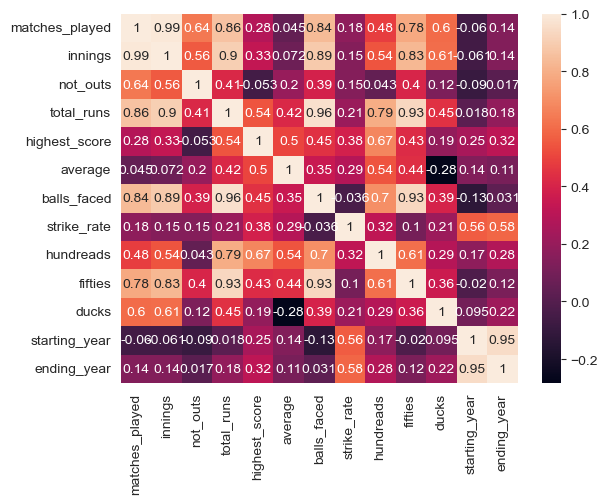

In [123]:
sns.heatmap(data.corr(),annot=True)

# conclusion

- The players have to maintain a good average on every match it will make them the top player of their team as well as world.

# conclusion (team wise)

- India : Indian players has to decrease the duck out counts to become best team after some years.
- Australia : has to maintain good average increase the high score and total runs.
- Pakistan : has to increase high-score and total runs matches played.
- England : has to increase matches played ,total runs , high score.
- West indies : has to increase matches played and total runs.
- South Africa : has to increase high score , total runs average,matches played.
- New zealand : has to increase matchesplayed, average, total runs , highest score.
- Sri lanka : has to increase highest score total runs average.
- Bangladesh : has to imcrease high score , total runs average centuries , player count
- Zimbabwe : total runs centuries fifties matches played and has to decrese the duck outs,player count.